# Project One


## County-level Exploration of Demographics and Socioeconomical Factors for the 2020 Presidential Election

## Introduction
Every four years, the world has its eyes set on the United States as it undergoes its presidential election. With months of rallies and campaigning by different candidates and parties nationwide, the winning party and candidate of this election will cause significant changes for other countries besides the United States. With the more recent 2020 election taking place during a worldwide pandemic, understanding the important factors behind the results of this election is crucial for learning trends behind voting results at the county level. Providing background information, the 2020 election was one of the most important elections, with the US accounting for one-fifth of the deaths during COVID-19 and the Black Lives Matter protests being one of the most significant movements in the US (Boyd, Krieger, & Jones, 2020). Such social and political polarizing events have influenced this election more by county demographics and political preferences.

With numerous potential factors impacting one's voting preference, research closely related to demographics and voting factors on election results in the 2020 election found that "most counties that Trump won tended to be populated with people who are more white and less educated" compared to Biden-won counties (Smith, 2021). With the 2020 election, a paper has found that the COVID-19 cases negatively impacted Trump's vote shares in 2020 compared to 2016 (Baccini, Brodeur, & Weymouth, 2021). This further confirms that this 2020 election was one of history's more unique and different elections. Looking at other geographical factors, two research studies provide input regarding the geographical and urbanization impact on the political divide, concluding that the type of environment of location impacted their political siding (Wing & Walker, 2009; Gimple et al., 2020). Another potential factor is education; research found that more educated people tend to have higher voter turnout than their counterparts (Kim, 2023). With many different factors affecting how people vote, there are many potential correlations and other factors that could play into explaining the presidential elections.

With many factors affecting how people vote, looking at a more county-specific level, one research tracked voter files and migration data and found that "the percentage migrating to a different county but within the state varies from 1% to 30%" (Tam Cho, Gimpel, & Hui, 2012). This shows trends between the type of people within a country and party support. Another study used a research method that explored the county level and concluded that geographical polarization exists across different counties (Kinsella, McTague, & Raleigh, 2015). This research proves that county demographics and geography impact political influence. Similar research on political influence explored the relationship between education and political alignment at a county level and found a correlation between education and party preference, with a higher rate of degree holders aligning more with the Democratic Party (Zigher, 2022). With education being a potential factor for explaining the presidential results, further factors could be drawn to provide
an even better understanding. Another study at the county level found that higher-income groups tend to vote more often than lower-income groups (Laurison, Brown, & Rastogi, 2021).
Most research regarding the 2020 election results focused on a county's demographic and socioeconomic factors. This project will also examine the voting results from other branches of the government.

The research question will look at what demographic potential voting factors within a county best explain the US 2020 presidential election results.
<br>

## Dataset Cleaning/Loading

The Primary data set "US Election 2020" will be combined with the secondary data "US Election Dataset" (Fontes, 2021) (essarabi, 2020).

The Independent variables are median income, population, degree attainment, urban density, racial makeup, governor party winner, house party winner, and senate party winner, all at the county level. The dependent variable will focus on the county's presidential election results.

Median income highlights the overall economic state of the county's residents. The county's financial state is a key factor in how residents potentially vote in cases to support specific policies or acts from one of the parties that directly benefit them.

A county's population tells us about voter turnout and suburban or urban areas. Counties with drastically different populations could have different voting factors and patterns that can be explored across other counties in and at the state level.
Note: There were 57 values with counts equal to 2 for mode calculation.

Degree attainment indicates the percentage of residents who graduated with an associate degree or higher. Other research on this variable suggests that education influences political preference.

Urban density tells us how populated a specific county is. This could impact how counties vote, as some parties may support more urban areas than less urbanized ones. Density could also indicate major cities within specific counties, which could link to other variables listed.

Racial demographics show whether the county is dominated by white people or people of color. Race has always indicated potential political alignment due to specific policies that could benefit it. This information helps us determine whether a racial demographic has strong voting trends.

The winners of the governor, House, and senate races within each county may each show trends within the party and presidential party winners of that county. This can show party
alignment within a county and how the winning party of these sectors could correlate with the presidential results.
<br>

In [1]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

%matplotlib inline

def load_data():
    # Set variable to global scope
    global president_county_cand
    global senate_county_cand
    global governor_county_cand
    global house_cand
    global us_election
    global states
    global president_county_cand_won
    global governor_county_cand_won
    global house_cand_won
    global senate_county_cand_won
    global final_df
    
    # Load Dataset files
    # load president_county_candidate.csv
    president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')
    #president_county_cand.head()
    
    # load senate_county_candidate.csv
    senate_county_cand = pd.read_csv('../Data/senate_county_candidate.csv')
    senate_county_cand.head()
    
    # load governors_county_candidate.csv
    governor_county_cand = pd.read_csv('../Data/governors_county_candidate.csv')
    governor_county_cand.head()
    
    # load house_county_candidate.csv
    house_cand = pd.read_csv('../Data/house_candidate.csv')
    house_cand.head()
    
    # load US_Election_dataset_v1.csv
    us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")
    #us_election.head()
    
    # load State.csv
    states = pd.read_csv('../Data/states.csv')
    states.head()
    
    # data cleaning: president_county_cand
    # col 'state'
    president_county_cand['state'] = president_county_cand['state'].str.upper()
    president_county_cand['state'] = president_county_cand['state'].str.strip()
    president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
    # col 'county'
    president_county_cand['county'] = president_county_cand['county'].str.upper()
    president_county_cand['county'] = president_county_cand['county'].str.strip()
    president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
    # merge with states dataset
    president_county_cand = pd.merge(president_county_cand, states, \
                        left_on='state', right_on='STATE', how="left")
    # president_county_cand_won: filter in won is True
    president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
    president_county_cand_won
    
    # data cleaning: governor_county_cand
    # col 'state'
    governor_county_cand['state'] = governor_county_cand['state'].str.upper()
    governor_county_cand['state'] = governor_county_cand['state'].str.strip()
    # col 'County Name'
    governor_county_cand['county'] = governor_county_cand['county'].str.upper()
    governor_county_cand['county'] = governor_county_cand['county'].str.strip()
    governor_county_cand['county'] = governor_county_cand['county'].str.replace(" COUNTY", "")
    governor_county_cand['county'] = governor_county_cand['county'].str.upper()
    # filter in won is True
    governor_county_cand_won = governor_county_cand.loc[governor_county_cand['won'] == True].copy()
    
    # data cleaning: house_cand
    # col 'state'
    house_cand['district'] = house_cand['district'].str.upper()
    house_cand['district'] = house_cand['district'].str.strip()
    # filter in won is True
    house_cand_won = house_cand.loc[house_cand['won'] == True].copy()
    #print(house_cand_won)
    
    # data cleaning: senate_county_cand
    # col 'state'
    senate_county_cand['state'] = senate_county_cand['state'].str.upper()
    senate_county_cand['state'] = senate_county_cand['state'].str.strip()
    # col 'County Name'
    senate_county_cand['county'] = senate_county_cand['county'].str.upper()
    senate_county_cand['county'] = senate_county_cand['county'].str.strip()
    senate_county_cand['county'] = senate_county_cand['county'].str.replace(" COUNTY", "")
    senate_county_cand['county'] = senate_county_cand['county'].str.upper()
    # filter in records with max total_votes (won)
    senate_county_cand_won = senate_county_cand.copy()
    idx = senate_county_cand_won.groupby(['state', 'county'])['total_votes'].idxmax()
    senate_county_cand_won = senate_county_cand_won.loc[idx]
    
    # data cleaning: us_election
    us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
    # col 'state'
    us_election['state'] = us_election['state'].str.upper()
    us_election['state'] = us_election['state'].str.strip()
    # col 'County Name'
    us_election['county'] = us_election['county'].str.upper()
    us_election['county'] = us_election['county'].str.strip()
    us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
    us_election['county'] = us_election['county'].str.upper()


# Load data
load_data()


In [2]:
# Prepare necessary columns

def prepare_data():
    # Set variable to global scope
    global president_county_cand
    global president_county_cand_won
    global senate_county_cand_won
    global governor_county_cand_won
    global house_cand_won
    global us_election
    global final_df
    
    # president_county_cand: prepare columns
    party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
    party_map = {'DEM': 0.0, 'REP': 1.0}
    president_county_cand['Party_Index'] = president_county_cand['party'].map(party_map)
    president_county_cand['party'] = president_county_cand['party'].map(
        lambda x: party_dict.get(x, 'Third-Party'))
    
    # president_county_cand_won: prepare columns
    president_county_cand_won['Party_Index'] = president_county_cand_won['party']. \
                                               map(party_map)
    president_county_cand_won['party'] = president_county_cand_won['party']. \
                                         map(lambda x: party_dict.get(x, 'Third-Party'))
    #print(president_county_cand_won.head())
    
    # senate_county_cand_won: prepare columns
    senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in \
                                             senate_county_cand_won['party']]
    senate_county_cand_won['party'] = senate_county_cand_won['party']. \
                                      map(lambda x: party_dict.get(x, 'Third-Party'))
    #print(senate_county_cand_won.head())
    
    # governor_county_cand_won: prepare columns
    governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in \
                                               governor_county_cand_won['party']]
    governor_county_cand_won['party'] = governor_county_cand_won['party']. \
                                        map(lambda x: party_dict.get(x, 'Third-Party'))
    #print(governor_county_cand_won.head())
    
    # house_cand_won: prepare columns
    house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
    house_cand_won['party'] = house_cand_won['party']. \
                                    map(lambda x: party_dict.get(x, 'Third-Party'))
    #print(house_cand_won.head())
    
    # us_election: clean data and prepare new columns
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].replace({"": "0", "-": "0"})
    us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
    us_election['Median_Income_k'] = us_election['Median_Income'].div(1000.0)
    us_election['Won_Vote'] = us_election[["2020 Democrat vote raw", \
                              "2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
    us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + \
                                us_election["2020 Republican vote raw"] + \
                                us_election["2020 other vote raw"]
    us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
    us_election['Degree_Or_Higher_Percentage'] = \
            us_election["Associates Degree"].str.rstrip('%').astype('float') + \
            us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
            us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
    us_election['Race_Index'] = np.where(us_election['NH-White percentage'] >= 50, 1.0, 0.0)                             
    
    # merge datasets
    final_df = pd.merge(president_county_cand_won, us_election, \
                        on=['state', 'county'], how="inner")

# Prepare data
prepare_data()


## Summary Statistics Tables

**Continuous Data**

|                       |  Mean     | Standard Deviation  | Median   |  Mode      |  Range               |  Min     |   Max     |  Count  |
| --------------------- | ------    | ------------------- | -------- | --------   | -------------------- | -----    | --------- | ------- |
| **Income**            | 63305.60  | 16819.01            | 60931.00 | 61250.00   | 17900.00 - 170463.00 | 17900.00 | 170463.00 | 3142    |
| **Population**        | 105456.34 | 335760.39           | 25698    | (see note) | 64 - 10014009        | 64       | 10014009  | 3143    |
| **Degree Attainment** | 33.11%    | 10.40%              | 31.60%   | 34.50%     | 7.50% - 81.00%       | 81.00%   | 7.50%     | 3143    |
| **Urban Density**     | 106.44    | 704.09              | 17.27    | 13.28      | 0.01 - 28048.18      | 0.01     | 28048.18  | 3143    |

The income table shows the overall median income for every county in the US. The range shows a more significant difference in income. The table is skewed to the right, meaning more counties have lower median incomes. 

The population of each county gives us an overall idea of how big each county would be by looking at the mean. 

The degree attainment rate gives us an idea of the percentage of the county that has received some degree. The mean degree attainment for the counties is about 33%. This data is skewed right, and the mode percentage is roughly similar to the mean, meaning that most counties have a degree attainment rate of approximately 33%.

The urban density for the counties shows some significant outliers, especially in major cities in specific counties, which causes the range to be huge. Also, the county's urban density is related to its population.

**Categorical Data**

|               |  Mean    | Standard Deviation  |  Count  |
| ------------- | ------   | ------------------- | ------- |
| **Governor**  | 0.921951 | 0.268379            | 1025    |
| **House**     | 0.488532 | 0.500443            | 436     |
| **Senate**    | 0.309378 | 0.462305            | 3423    |
| **Race**      | 0.871779 | 0.334389            | 3423    |

A dummy variable was assigned for the categorical data in the second table. For the political value (0=democrat, 1=republican) and race (1=white-dominated, 0=people of color-dominated). Republicans dominated the House votes at 0.92, while Senate seats leaned more for Democrats at 0.30.

<br>

In [4]:
# Get statistics

print("\n====================")
print("Governor:")
print("====================")
print(governor_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Governor - MEDIAN:")
print("====================")
print(governor_county_cand_won['Party_Index'].median())
print("\n====================")
print("Governor - MODE:")
print("====================")
print(governor_county_cand_won['Party_Index'].mode())

print("\n====================")
print("House:")
print("====================")
print(house_cand_won['Party_Index'].describe())
print("\n====================")
print("House - MEDIAN:")
print("====================")
print(house_cand_won['Party_Index'].median())
print("\n====================")
print("House - MODE:")
print("====================")
print(house_cand_won['Party_Index'].mode())

print("\n====================")
print("Senate:")
print("====================")
print(senate_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Senate - MEDIAN:")
print("====================")
print(senate_county_cand_won['Party_Index'].median())
print("\n====================")
print("Senate - MODE:")
print("====================")
print(senate_county_cand_won['Party_Index'].mode())

# generate statistics
print("\n====================")
print("4 Variables:")
print("====================")
columns = ["Median_Income", "Degree_Or_Higher_Percentage", "Total Population", "Density per square km", "Race_Index"]
print(us_election[columns].describe().transpose())
print("\n====================")
print("4 Variables - MEDIAN:")
print("====================")
print(us_election[columns].median())
print("\n====================")
print("4 Variables - MODE:")
print("====================")
print(us_election[columns].mode())





Governor:
count    1025.000000
mean        0.921951
std         0.268379
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Governor - MEDIAN:
1.0

Governor - MODE:
0    1.0
Name: Party_Index, dtype: float64

House:
count    436.000000
mean       0.488532
std        0.500443
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Party_Index, dtype: float64

House - MEDIAN:
0.0

House - MODE:
0    0.0
Name: Party_Index, dtype: float64

Senate:
count    3423.000000
mean        0.309378
std         0.462305
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Party_Index, dtype: float64

Senate - MEDIAN:
0.0

Senate - MODE:
0    0.0
Name: Party_Index, dtype: float64

4 Variables:
                              count           mean            std       min  \
Median_Income                3142.0 

## Plots, Histograms, Figures



### Graph-1: Number of Counties Won by Party in the 2020 Presidential Election


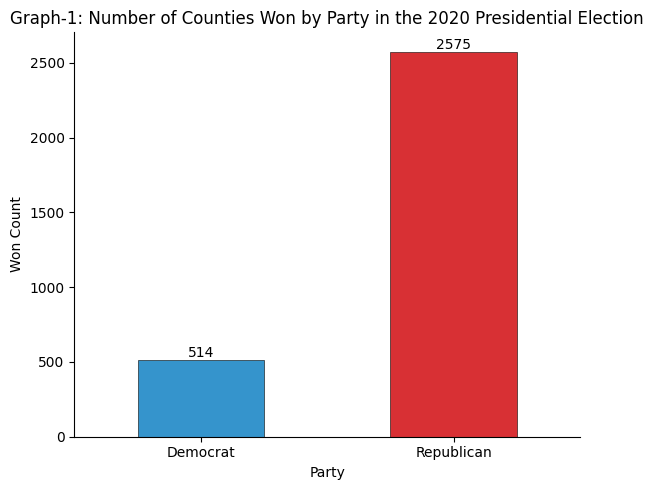

In [5]:
# Graph-1: Number of Counties Won by Party in the 2020 Presidential Election

# calculate value counts
counts = final_df['party'].value_counts()

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']

fig, ax = plt.subplots(figsize=(6, 5))
counts.sort_index().plot(kind='bar', color=colors, edgecolor='black', linewidth=0.4)

# plot barchart
plt.xticks(rotation=0)
ax.set_xlabel('Party')
ax.set_ylabel('Won Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graph-1: Number of Counties Won by Party in the 2020 Presidential Election")
ax.bar_label(ax.containers[0])

# Show the plot
plt.tight_layout()
plt.show()

This graph shows the counties that voted for each party except four that voted for a third-party candidate. Although Republicans have a massive advantage in county wins compared to Democrats, this still results in them winning the presidential race. There might be underlying factors that explain the big difference in county wins.

<br>

### Graph-2: County Median Income and Vote Share in the 2020 Presidential Election


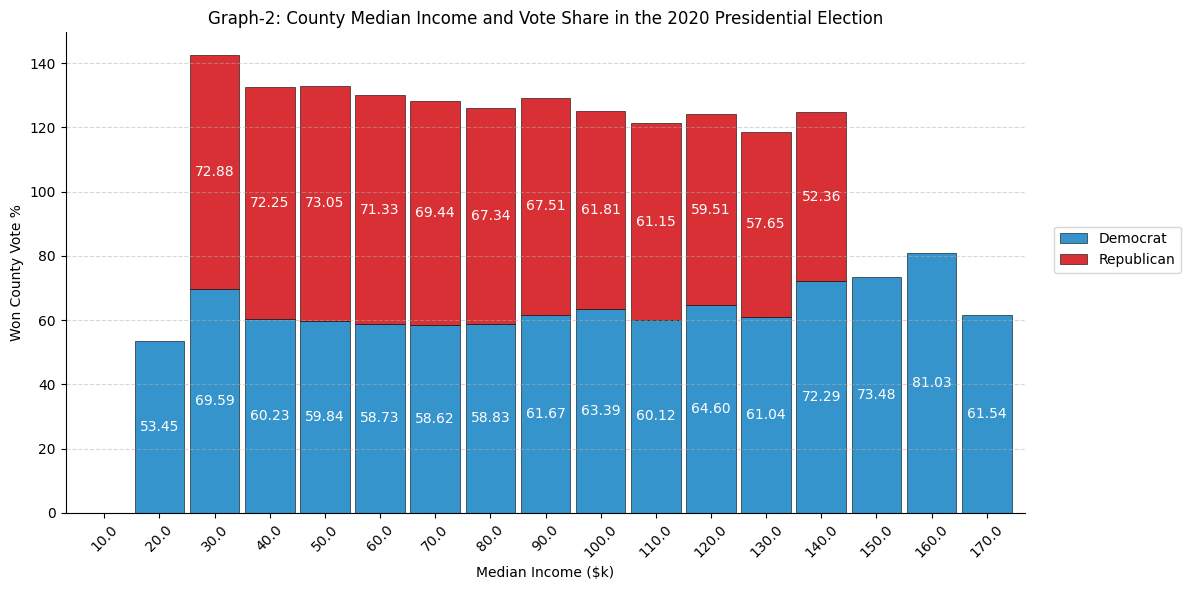

In [6]:
# Graph-2: County Median Income and Vote Share in the 2020 Presidential Election
# select columns to be ploted
data_df = final_df[['Median_Income_k', 'Vote_Percentage', 'party']]

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  

# group Education attainment in range
income_bins = np.arange(5.0, 180.0, 10.)
pivot1_df = data_df.copy()
pivot1_df['IncomeGroup'] = pd.cut(data_df["Median_Income_k"], bins=income_bins)
pivot1_df['IncomeGroupMid'] = pivot1_df['IncomeGroup'].apply(lambda x: x.mid)
pivot2_df = pivot1_df.groupby(['party', 'IncomeGroupMid'], observed=False).agg(
                Vote_Percentage_Mean=('Vote_Percentage', 'mean')).reset_index().copy()

# Pivot the DataFrame
pivot3_df = pivot2_df.pivot(index='IncomeGroupMid', columns='party', 
                            values='Vote_Percentage_Mean')

# Plotting with custom colors
ax = pivot3_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.9, 
                    color=colors, edgecolor='black', linewidth=0.4)

# Adding values on the bars
for i, party in enumerate(pivot3_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot3_df.columns):
        value = pivot3_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Median Income ($k)')
plt.ylabel('Won County Vote %')
plt.title('Graph-2: County Median Income and Vote Share in the 2020 Presidential Election')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

This graph displays the median income and the winning vote percentage within the winning county's winning party, showing how much each county wins at different income levels. Higher-income groups tend to have higher vote percentages for Democrats, while lower-income
counties support Republicans. For example, counties that fall within the 30k bins won by Republicans, on average, won with 72.88% of votes, while the Democrats won with 65.9%. The two lowest and highest ranges of counties were all won by Democrats.

<br>

### Graph-3: Vote Share for Winning Party by Degree Attainment Levels in the 2020 Presidential Election


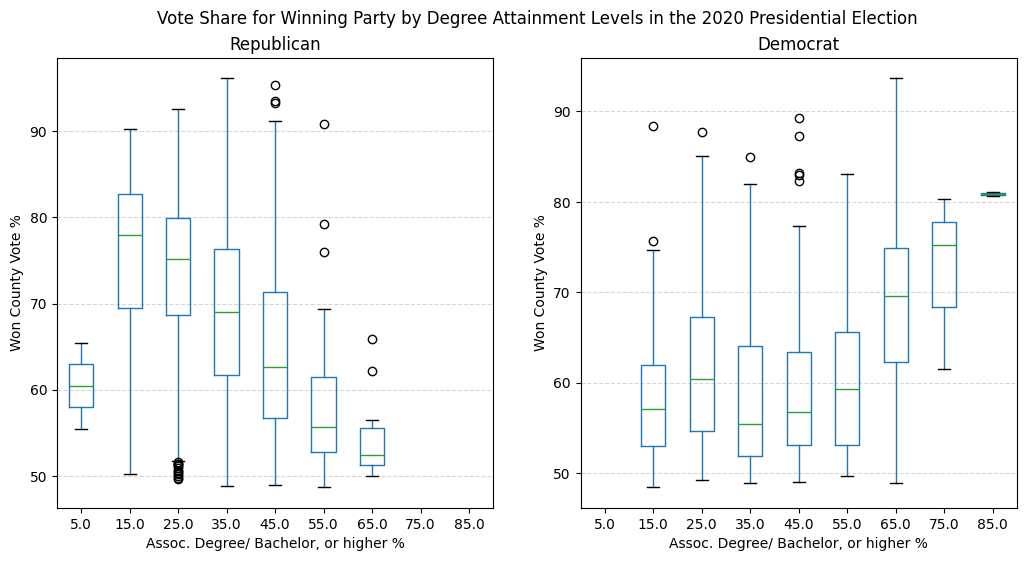

In [7]:
# Graph-3: Vote Share for Winning Party by Degree Attainment Levels in the 2020 Presidential Election
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Degree_Or_Higher_Percentage", "Vote_Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Degree_Or_Higher_Percentage"], 
                                 bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], 
               ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], 
               ax=ax[1], grid = False) 

fig.suptitle("Vote Share for Winning Party by Degree Attainment Levels in"
             " the 2020 Presidential Election")
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
ax[0].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
ax[1].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")
plt.show()

This graph compares winning counties' vote share for Republicans and Democrats with their degree attainment rate. We can see that counties that vote Democrat have higher degree rates, with the Democrats' being more skewed left than the Republicans' being more skewed right. The average mean winning percentage for Republicans also gradually decreased after 15% compared to Democrats, which stayed even at around the 55% range and increased as the degree attainment increased.

<br>

### Graph-4: Population and Vote Share in the 2020 Presidential Election


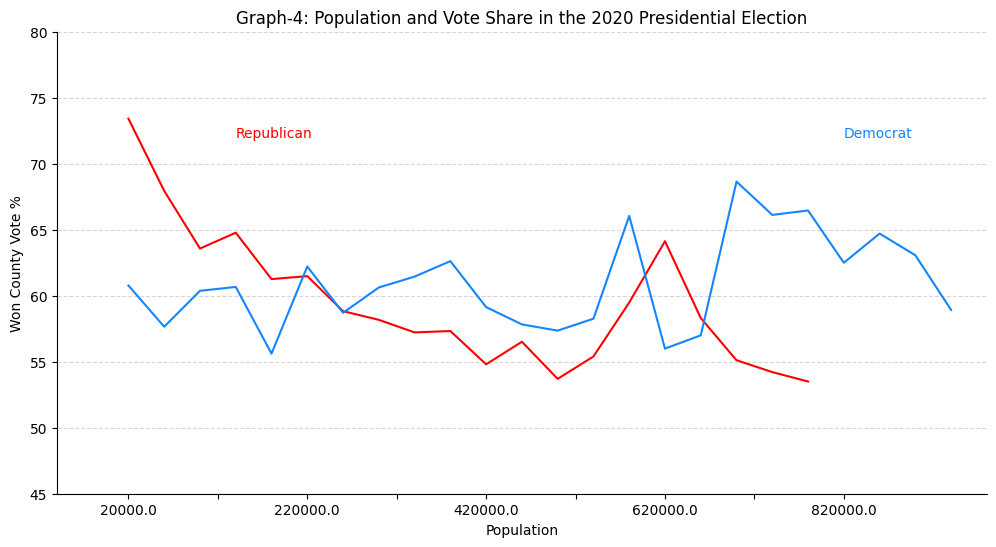

In [8]:
# Graph-4: Population and Vote Share in the 2020 Presidential Election

fig, ax = plt.subplots(figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Total Population", "Vote_Percentage", "party"]]

# group population in range
population_bins = np.arange(0, 1000000, 40000)

g4_df = data_df.copy()
g4_df['TotalPopulationGroup'] = pd.cut(data_df["Total Population"], 
                                       bins=population_bins)

# create Average of Vote Percentage
g4_df = g4_df.groupby(['TotalPopulationGroup', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()
g4_df['TotalPopulationGroupMid'] = g4_df['TotalPopulationGroup'].apply(
                                        lambda x: x.mid)
g4_df.set_index('TotalPopulationGroupMid', inplace=True)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

rep_df = g4_df[g4_df['party']=='Republican'].copy()
rep_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
rep_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, 
color=colors["Republican"], linewidth=1.5)

dem_df = g4_df[g4_df['party']=='Democrat'].copy()
dem_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
dem_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, 
            color=colors["Democrat"], linewidth=1.5)

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xlabel("Population")
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-4: Population and Vote Share in the "
             "2020 Presidential Election")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(45, 80)
ax.set_xlim(-2, 24)


ax.annotate("Democrat", (20, 72), color=colors["Democrat"])
ax.annotate("Republican", (3, 72), color=colors["Republican"]);


This shows the population and the county vote win percentage for each party represented by the different lines. We can see how the population affects their voting party support. Republican-supported counties tend to have lower population numbers within their counties, and we can see a decrease in winning vote percentage as the population increases. For democrats, counties have somewhat of a constant winning vote percentage but are more volatile throughout.

<br>

### Graph-5: State Comparison of Presidential Votes by Party in the 2020 Election

In [9]:
from matplotlib.ticker import FuncFormatter

# Function to plot region state party vote chart
def plot_region_state_party_vote_chart(region: str, title: str, max_value: float, 
                                       chart_height: float):
    # select columns to be ploted
    data_df = president_county_cand.groupby(['state', 'party', 'REGION']).agg(
                                            {'total_votes': 'sum'})
    data_df = data_df.reset_index()
    data_df = data_df[data_df['REGION'] == region]
    data_df = data_df.reset_index()

    # Reshape the DataFrame using pivot_table
    pivot_df = data_df.pivot_table(index='state', columns='party', 
                                   values='total_votes', 
                                   aggfunc='sum').reset_index()

    #pivot_df = pivot_df.reindex(pivot_df['state'].sort_values(ascending=False).index)

    # Fill missing values with 0 (if any)
    pivot_df = pivot_df.fillna(0)

    # plot graph
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(11, chart_height))
    #fig, ax = plt.subplots(figsize=(11, 24))

    # Define custom colors for each type
    colors = {
        'Democrat': '#3594cc',  # Blue
        'Republican': '#d83034',  # Red
        'Third-Party': '#36b700'  # Green
    }

    # Number of states
    n_states = len(pivot_df['state'])
    
    # Height of the bars
    bar_height = 0.29
    
    # Positions for the bars
    index = np.arange(n_states)
    
    # Plotting each party
    for i, party in enumerate(['Democrat', 'Republican', 'Third-Party']):
        ax.barh(index + i * bar_height, pivot_df[party], bar_height, label=party, 
                color=colors[party])
    
    # Adding labels and title
    ax.set_xlabel('No. of votes')
    ax.set_ylabel('State')
    ax.set_title(title)
    #ax.set_title("Graph-5(a): Northeast States Comparison of Presidential Votes by "
    #             "Party in the 2020 Election")
    ax.set_yticks(index + bar_height)
    ax.set_yticklabels(pivot_df['state'])
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Format x-axis ticks as integers
    def format_votes(x, pos):
        return f'{int(x):,}'  # Format as integer with commas as thousand separators
    
    # format x-axis label
    ax.xaxis.set_major_formatter(FuncFormatter(format_votes))
    
    # Adjust y-axis limits to remove extra white space
    #ax.set_xlim(0, 12000000)
    ax.set_xlim(0, max_value)
    ax.set_ylim(-0.5, n_states)  # Adjust the limits to fit the bars tightly
    
    # Show the plot
    plt.tight_layout()
    plt.show()

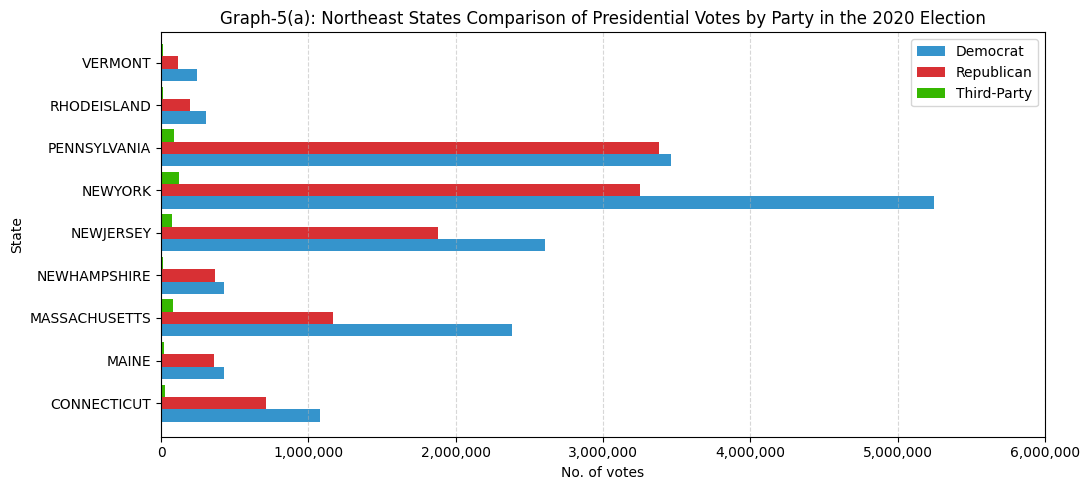

In [10]:
# Graph-5(a) Northeast states
title = "Graph-5(a): Northeast States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('NORTHEAST', title, 6000000, 5)


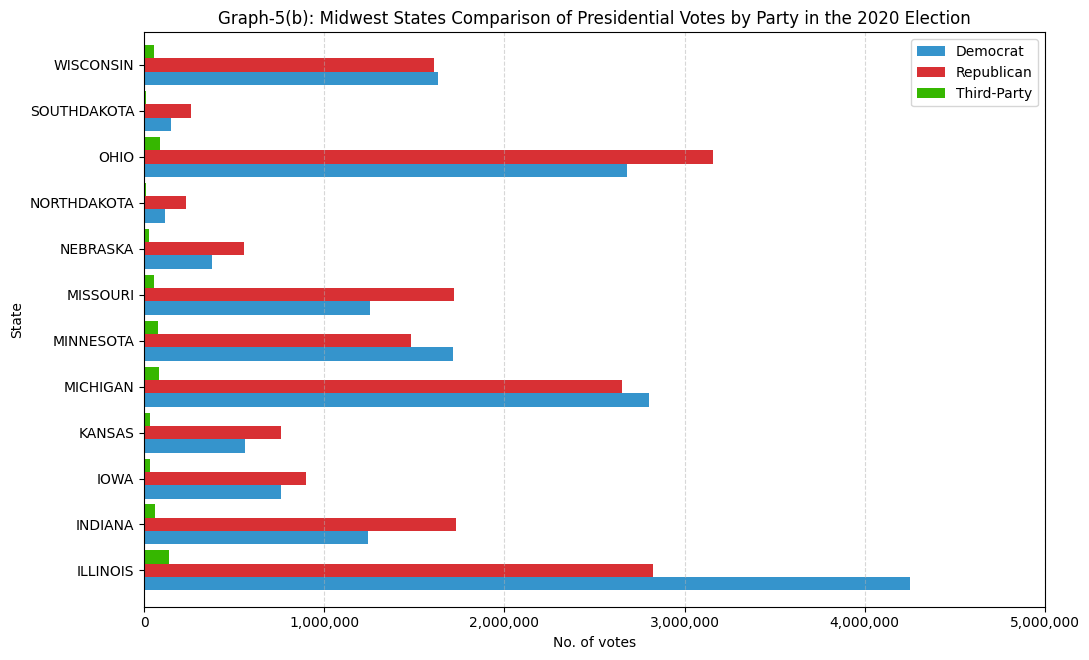

In [11]:
# Graph-5(b) Northeast states
title = "Graph-5(b): Midwest States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('MIDWEST', title, 5000000, 6.7)


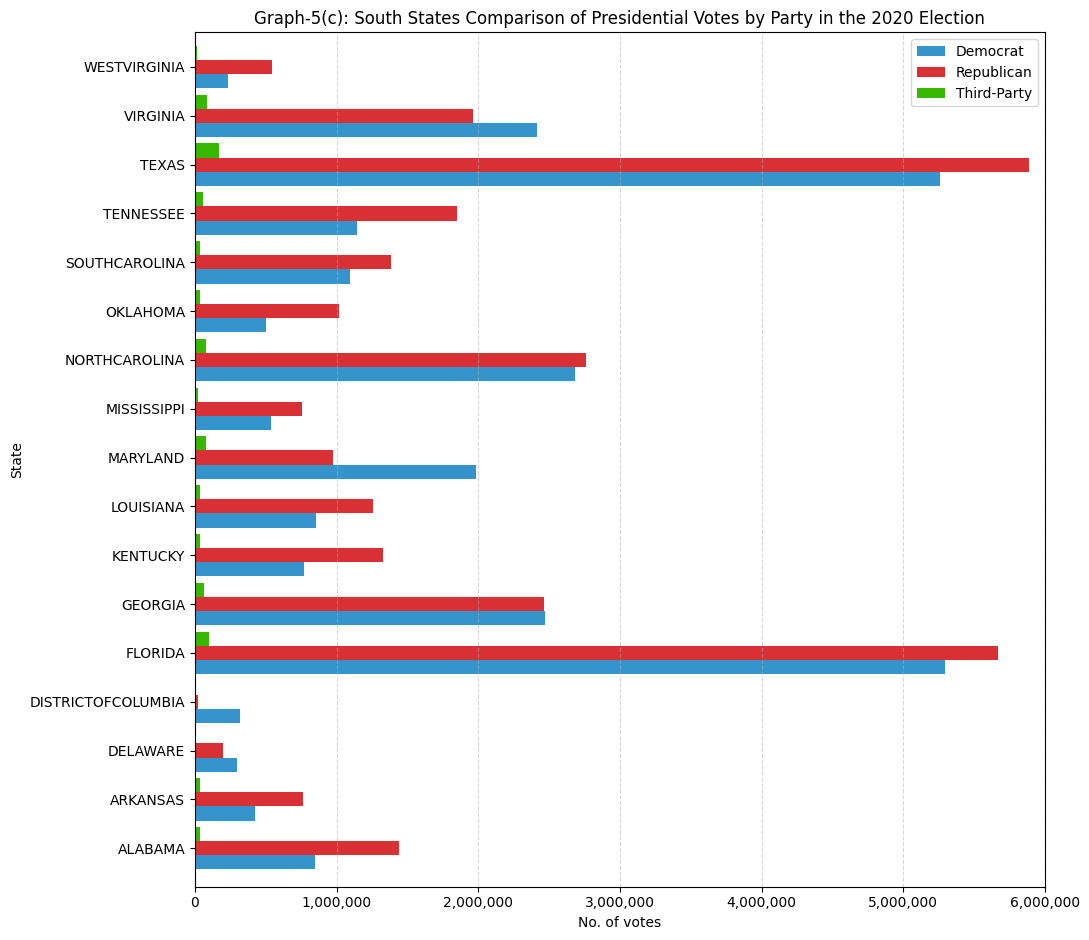

In [12]:
# Graph-5(c) Northeast states
title = "Graph-5(c): South States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('SOUTH', title, 6000000, 9.5)

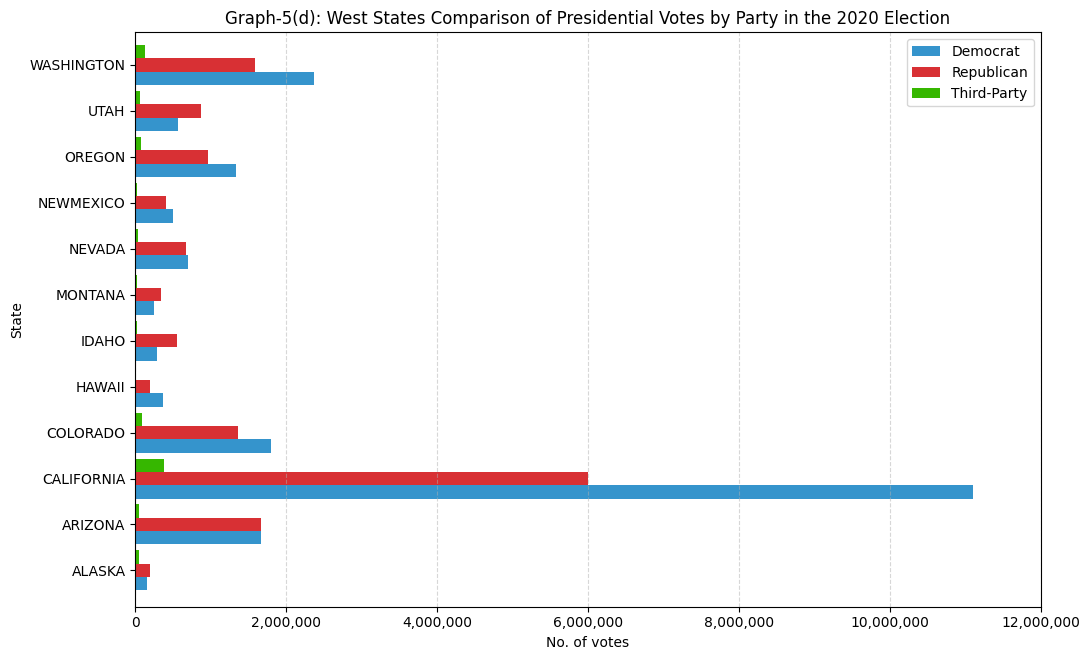

In [13]:
# Graph-5(d) West states
title = "Graph-5(d): West States Comparison of Presidential Votes by " \
        "Party in the 2020 Election"
plot_region_state_party_vote_chart('WEST', title, 12000000, 6.7)

This graph shows the votes for each party by state, comparing how each state voted. Smaller voting states tend to have more votes for Republicans, while larger voting states have more for Democrats. This aligns with our population graph, as our population also saw similar trends in party support.

<br>

### Graph-6: Vote Share by Urban Density  in the 2020 Presidential Election


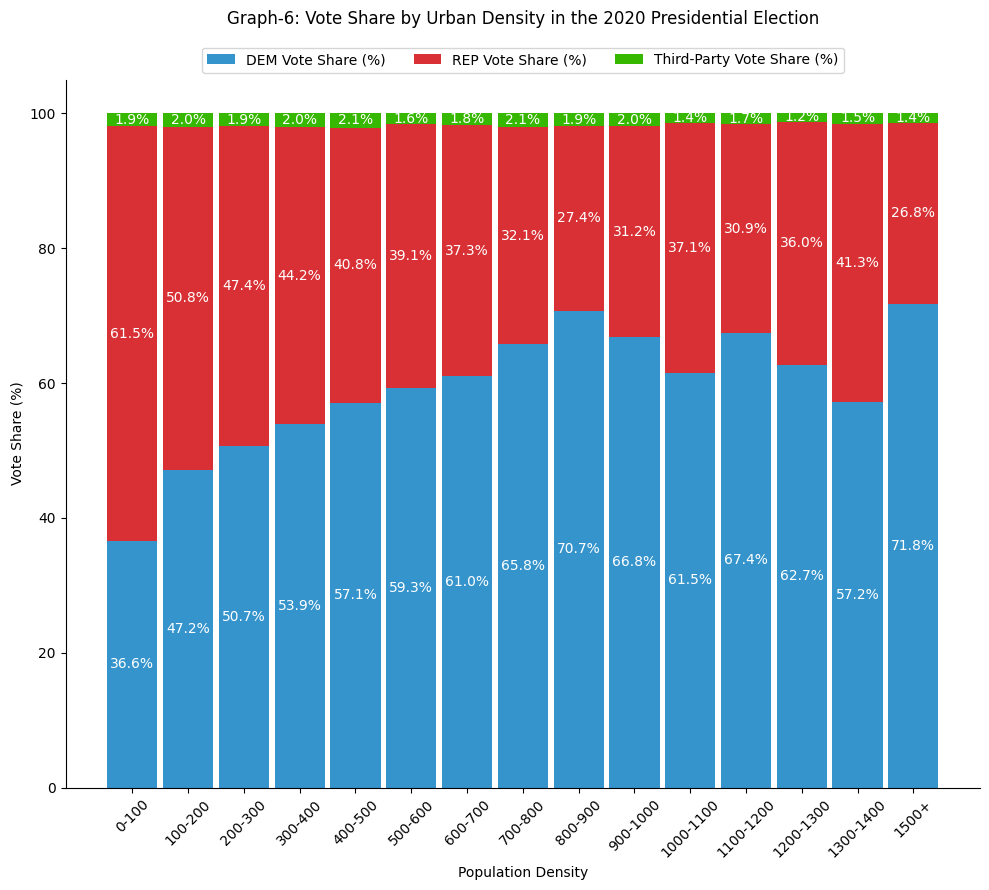

In [14]:
# Graph-6: Vote Share by Urban Density in the 2020 Presidential Election

# select columns to be ploted
data_df = us_election.copy()

# Define custom bins for population density: 0-1500 in steps of 100, and 1500+
density_bins = list(range(0, 1500, 100)) + [np.inf]  
# Assign each county to a population density bin
data_df['Density_Bin'] = pd.cut(data_df['Density per square km'], bins=density_bins, 
                                right=False)

# Group by the density bin and calculate the total votes for each party in each bin
grouped_df = data_df.groupby('Density_Bin', observed=False)[['2020 Democrat vote raw', 
             '2020 Republican vote raw', '2020 other vote raw', 'Total_Vote']].sum()

# Calculate the vote share percentage for each party in each bin
grouped_df['DEM_Share'] = grouped_df['2020 Democrat vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['REP_Share'] = grouped_df['2020 Republican vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['THIRDPARTY_Share'] = grouped_df['2020 other vote raw'] / grouped_df['Total_Vote'] * 100


# Plot the stacked histogram
fig, ax = plt.subplots(figsize=(10, 9))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Define the x-axis labels (bin intervals)
x_labels = [f'{int(b.left)}-{int(b.right)}' if not np.isinf(b.right) \
            else '1500+' for b in grouped_df.index]

# Convert the vote share columns to NumPy arrays
dem_share = grouped_df['DEM_Share'].values
rep_share = grouped_df['REP_Share'].values
thirdparty_share = grouped_df['THIRDPARTY_Share'].values

# Plot the stacked bars
bar_width = 0.9
dem_bars = ax.bar(x_labels, dem_share, label='DEM Vote Share (%)', 
                  color=colors['Democrat'], width=bar_width)
rep_bars = ax.bar(x_labels, rep_share, bottom=dem_share, label='REP Vote Share (%)', 
                  color=colors['Republican'], width=bar_width)
thirdparty_bars = ax.bar(x_labels, thirdparty_share, bottom=dem_share + rep_share, 
                         label='Third-Party Vote Share (%)', 
                         color=colors['Third-Party'], width=bar_width)

# Add values inside the bars
def add_values(bars, bottom=None):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + height / 2 if bottom is None else bottom[i] + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', 
                color='white', fontsize=10)

# Add values to each stacked bar
add_values(dem_bars)
add_values(rep_bars, bottom=dem_share)
add_values(thirdparty_bars, bottom=dem_share + rep_share)

# Add labels and title
ax.set_xlabel('Population Density')
ax.set_ylabel('Vote Share (%)')
ax.set_title("Graph-6: Vote Share by Urban Density "
             "in the 2020 Presidential Election", pad=40)
# Move the legend to the top in one row
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



This shows the population density and the counties' vote share percentage within the density range. It also indicates whether there are trends in party support depending on the population density of different counties. For example, more counties vote for Republicans in lower-density areas, while the opposite is true for Democrats.


<br>

### Graph-7: Proportion of Counties Won by Party Across Different Election Types

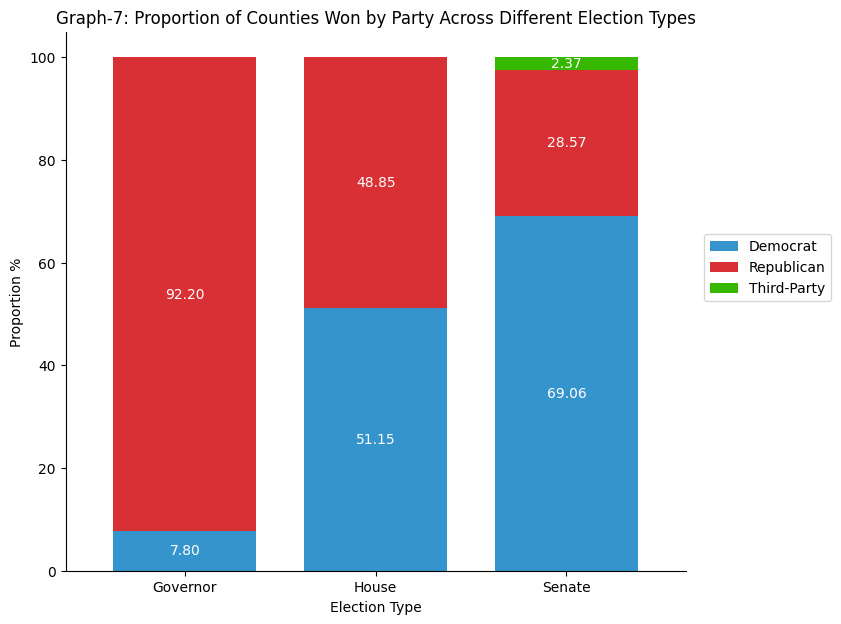

In [15]:
# Graph-7: Proportion of Counties Won by Party Across Different Election Types

# Prepare data
house_df = house_cand_won.groupby('party').agg(
                    Proportion=('party', 'count')).reset_index().copy()
house_total_count = house_cand_won['party'].count()
house_df['Proportion'] = (house_df['Proportion'] / house_total_count) * 100.0

senate_df = senate_county_cand_won.groupby('party').agg(
                    Proportion=('party', 'count')).reset_index().copy()
senate_total_count = senate_county_cand_won['party'].count()
senate_df['Proportion'] = (senate_df['Proportion'] / senate_total_count) * 100.0

governor_df = governor_county_cand_won.groupby('party').agg(
                    Proportion=('party', 'count')).reset_index().copy()
governor_total_count = governor_county_cand_won['party'].count()
governor_df['Proportion'] = (governor_df['Proportion'] / governor_total_count) * 100.0

# Combine the DataFrames
house_df['Election Type'] = 'House'
senate_df['Election Type'] = 'Senate'
governor_df['Election Type'] = 'Governor'
combined_df = pd.concat([house_df, senate_df, governor_df])

# Pivot the DataFrame
pivot_df = combined_df.pivot(index='Election Type', columns='party', 
                             values='Proportion')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
bar_width = 0.75
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 7), 
                   width=bar_width, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Election Type')
plt.ylabel('Proportion %')
plt.title("Graph-7: Proportion of Counties Won by Party Across "
          "Different Election Types")
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

This graph shows the proportion of counties won by each party and the three other election types. For the governor, most counties voted for the Republican party, while the House had a more even distribution. The Democratic party was more dominant in the Senate, with the third party winning some Senate seats.

<br>

### Graph-8: Party Wins in White-Dominated vs. Person of Color-Dominated Counties in the 2020 Presidential Election

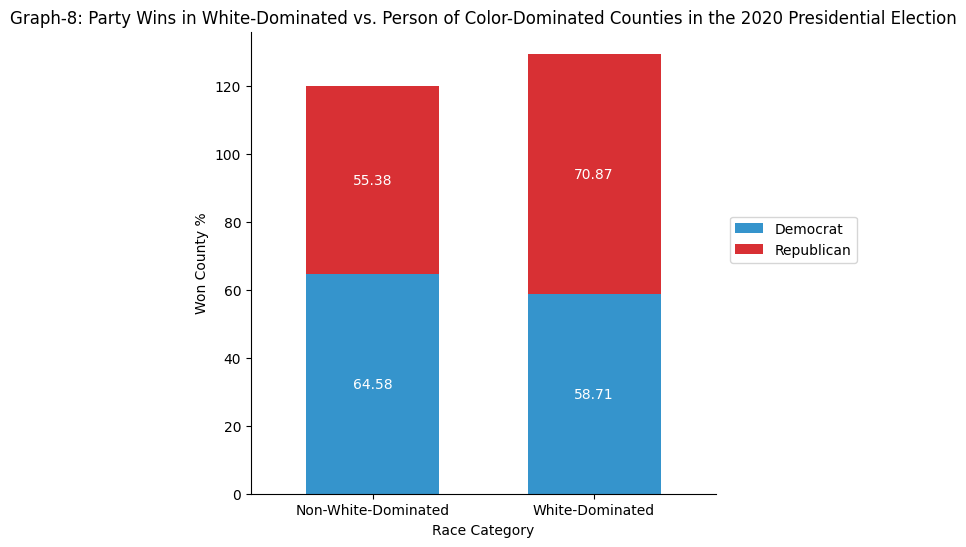

In [16]:
# Graph-8: Party Wins in White-Dominated vs. Person of Color-Dominated Counties in the 2020 Presidential Election

# select columns to be ploted
data_df = final_df.copy()
# Calculate NH-Rest percentage
data_df['NH-Rest'] = (
    data_df['NH-Black percentage'] + 
    data_df['NH-American Indian and Alaska Native percentage'] + 
    data_df['NH-Asian percentage'] + 
    data_df['NH-Native Hawaiian and Other Pacific Islander percentage'] + 
    data_df['NH-Some Other Race percentage'] + 
    data_df['NH-Two or More Races percentage']
)

# Classify counties as White-Dominated or Non-White-Dominated
data_df['Race_Type'] = np.where(
    data_df['NH-White percentage'] > data_df['NH-Rest'], 
    'White-Dominated', 
    'Non-White-Dominated'
)

data2_df = data_df[['party', 'Vote_Percentage', 'Race_Type']]

# create Average of Vote Percentage
data2_df = data2_df.groupby(['Race_Type', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()

# Pivot the DataFrame
pivot_df = data2_df.pivot(index='Race_Type', columns='party', 
                          values='Averge_Vote_Percentage')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
# Define custom colors for each type
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
bar_width = 0.6
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(6, 6), 
                   width=bar_width, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Race Category')
plt.ylabel('Won County %')
plt.title("Graph-8: Party Wins in White-Dominated vs. Person of Color-Dominated "
          "Counties in the 2020 Presidential Election")
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


This graph shows the racially dominated counties and the winning party percentage for each county. In a non-white-dominated party, the Democrats have a slight edge, as most non-white counties usually win by around 64%. White-dominated counties have a higher winning percentage, around 70%, for the Republican party. The Democratic winning percentage is also smaller in white-dominated counties.

<br>

# Project Two

## The Message

**Demographic and socioeconomic factors at the county level showed strong trends and influences during the 2020 Presidential election. These trends are in line with research conducted by others.**
<br>

### Main Message Graph: Education and White Proportion on Democratic Vote Percentage

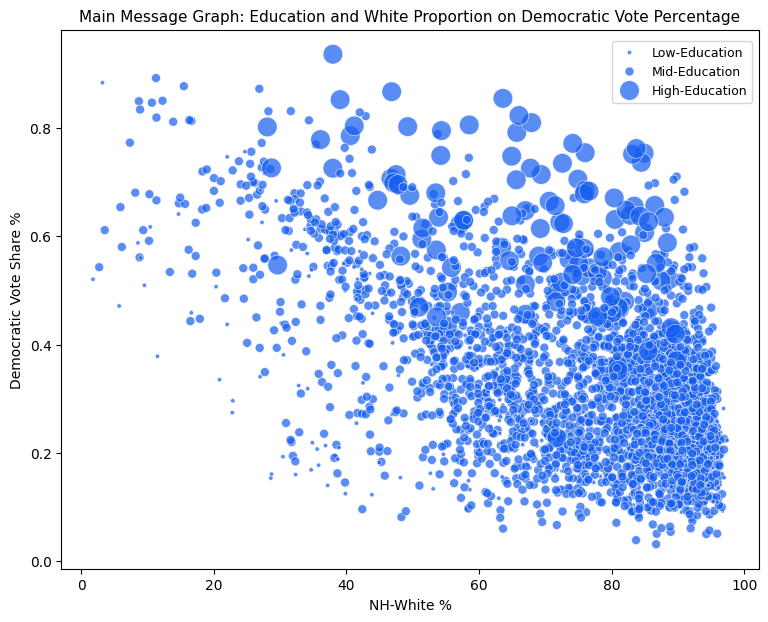

In [5]:
# Main Plot: Main Plot: Democratic Vote Share % vs NH-White % with Educatoin Level

from matplotlib.ticker import FuncFormatter

# Define the function to categorize education
def categorize_degree(degree_percentage):
    if degree_percentage < 20: 
        return 'Low-Education'
    elif degree_percentage >= 20 and degree_percentage <= 55:
        return 'Mid-Education'
    else:
        return 'High-Education'
final_df['Education_Type'] = final_df['Degree_Or_Higher_Percentage'].apply(categorize_degree)

final_df['DEM_Vote_Percentage'] = final_df["2020 Democrat vote raw"] / \
                                    (final_df["2020 Republican vote raw"] + \
                                    final_df["2020 Democrat vote raw"] + \
                                    final_df["2020 other vote raw"])
education_size = {
    'Low-Education': 12, 
    'Mid-Education': 20, 
    'High-Education': 60}  # Dot sizes for education categories

color_mapping = {
    'Low-Education': 'red', 
    'Mid-Education': 'green', 
    'High-Education': 'blue'}  # Dot colors for education categories

# Map education categories to dot sizes
final_df['Dot_Size'] = final_df['Education_Type'].map(education_size)

# Create the scatter plot
plt.figure(figsize=(9, 7))
scatter = sns.scatterplot(
    x='NH-White percentage',
    y='DEM_Vote_Percentage',
    size='Dot_Size',
    sizes=(10, 200),  # Range of dot sizes
    color='#145DF0',  # Dot color #3594cc
    #hue='Education_Type',  # Use 'Education_Type' for color
    #palette=color_mapping,  # Map colors to Education_Type categories
    alpha=0.70,  # Transparency of dots
    data=final_df
)

# Add title and labels
plt.title('Main Message Graph: Education and White Proportion on '
          'Democratic Vote Percentage', fontsize=11)
plt.xlabel('NH-White %')
plt.ylabel('Democratic Vote Share %')

#plt.xlim(0, 50)  # Set x-axis range to 0-100

# Add a legend for dot sizes
plt.legend(title='', loc='upper right')
# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ['Low-Education', 'Mid-Education', 'High-Education'], title='', 
           bbox_to_anchor=(0.78, 0.99), loc='upper left', fontsize=9)

# Show the plot
plt.show()


## Maps and Interpretations

In [6]:
# Load data and prepare columns for Project-2 maps and regressions

def load_map_data():
    # Set variable to global scope
    global state_df
    global counties_df
    global president_county_cand
    global alaska_president_county_cand
    global maine_president_county_cand
    global us_election
    global states
    
    # Load state boundaries from the U.S. Census Bureau
    #state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_5m.zip")
    state_df = gpd.read_file("../Data/cb_2020_us_state_5m.zip")
    
    # Load county boundaries from the U.S. Census Bureau
    #counties_df = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_5m.zip")
    counties_df = gpd.read_file("../Data/cb_2020_us_county_5m.zip")
    
    # load president_county_candidate.csv
    president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')
    
    # load alaska_president_county_candidate.csv
    alaska_president_county_cand = pd.read_csv('../Data/alaska_president_county_candidate.csv')
    
    # load maine_president_county_candidate.csv
    maine_president_county_cand = pd.read_csv('../Data/maine_president_county_candidate.csv')
    
    # load US_Election_dataset_v1.csv
    us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")
    
    # load State.csv
    states = pd.read_csv('../Data/states.csv')
    states.head()

def prepare_map_data():
    # Set variable to global scope
    global counties_df
    global president_county_cand
    global us_election
    global president_county_cand_won
    global states
    global county_map_df

    # data cleaning: counties_df
    # col 'NAME'
    counties_df['NAME'] = counties_df['NAME'].str.upper()
    counties_df['NAME'] = counties_df['NAME'].str.strip()
    counties_df['NAME'] = counties_df['NAME'].str.replace(" COUNTY", "")
    counties_df['NAME'] = counties_df['NAME'].str.upper()
    counties_df['STATEFP_INT'] = counties_df['STATEFP'].astype(int)
    # LOUISIANA  is missing " PARISH"
    counties_df.loc[counties_df['STATEFP_INT'] == 22, 'NAME'] += " PARISH"
    
    # data cleaning: president_county_cand
    # col 'state'
    president_county_cand['state'] = president_county_cand['state'].str.upper()
    president_county_cand['state'] = president_county_cand['state'].str.strip()
    president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
    # col 'county'
    president_county_cand['county'] = president_county_cand['county'].str.upper()
    president_county_cand['county'] = president_county_cand['county'].str.strip()
    president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
    # clean up Alaska records
    # remove alaska records
    president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'ALASKA' ]
    # add mapped alaska records to president_county_cand
    president_county_cand = pd.concat([president_county_cand, alaska_president_county_cand])
    # clean up Maine records
    # remove maine records
    president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'MAINE' ]
    # add mapped maine records to president_county_cand
    president_county_cand = pd.concat([president_county_cand, maine_president_county_cand])
    # col 'party'
    party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
    president_county_cand['party'] = president_county_cand['party'].map(
        lambda x: party_dict.get(x, 'Third-Party'))
    # president_county_cand_won: filter in won is True
    president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
    president_county_cand_won
    
    # data cleaning: us_election
    us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
    # col 'state'
    us_election['state'] = us_election['state'].str.upper()
    us_election['state'] = us_election['state'].str.strip()
    # col 'County Name'
    us_election['county'] = us_election['county'].str.upper()
    us_election['county'] = us_election['county'].str.strip()
    us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
    us_election['county'] = us_election['county'].str.replace(" CENSUS AREA", "")
    us_election['county'] = us_election['county'].str.replace(" CITY AND BOROUGH", "")
    us_election['county'] = us_election['county'].str.replace(" BOROUGH", "")
    us_election['county'] = us_election['county'].str.replace(" MUNICIPALITY", "")
    # us_election: clean data and prepare new columns
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].\
                                             replace({"": "0", "-": "0"})
    us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
    us_election['DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                         (us_election["2020 Republican vote raw"] + \
                                         us_election["2020 Democrat vote raw"] + \
                                         us_election["2020 other vote raw"])
    us_election['REP_Vote_Percentage'] = us_election["2020 Republican vote raw"] / \
                                         (us_election["2020 Republican vote raw"] + \
                                         us_election["2020 Democrat vote raw"] + \
                                         us_election["2020 other vote raw"])
    us_election['Rel_DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                                (us_election["2020 Republican vote raw"] + \
                                                us_election["2020 Democrat vote raw"])
    us_election['Rel_REP_Vote_Percentage'] = 1.0 - us_election['Rel_DEM_Vote_Percentage']
    us_election['Degree_Or_Higher_Percentage'] = \
            us_election["Associates Degree"].str.rstrip('%').astype('float') + \
            us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
            us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
    us_election['Degree_Or_Higher_Proportion'] = us_election['Degree_Or_Higher_Percentage'] / 100.0
    
    # Define the function to categorize population density
    def categorize_pop_density(density):
        if density < 193: 
            return 'Rural'
        elif density >= 193 and density <= 386:
            return 'Sub-Urban'
        else:
            return 'Urban'
    us_election['Area_Type'] = us_election['Density per square km'].apply(categorize_pop_density)
    
    # Define the function to categorize income
    def categorize_income(income):
        if income < 50000: 
            return 'Low-Income'
        elif income >= 50000 and income <= 100000:
            return 'Mid-Income'
        else:
            return 'High-Income'
    us_election['Income_Type'] = us_election['Median_Income'].apply(categorize_income)
    
    # Define the function to categorize education
    def categorize_degree(degree_percentage):
        if degree_percentage < 20: 
            return 'Low-Education'
        elif degree_percentage >= 20 and degree_percentage <= 55:
            return 'Mid-Education'
        else:
            return 'High-Education'
    us_election['Education_Type'] = us_election['Degree_Or_Higher_Percentage'].apply(categorize_degree)
    
    # merge datasets
    president_county_cand_won = pd.merge(president_county_cand_won, states, \
                        left_on='state', right_on='STATE', how="left")
    # Fill nan value with 0 (if any)
    president_county_cand_won['STATEFP'] = president_county_cand_won['STATEFP'].fillna(0)
    
    # merge with counties_df president_county_cand_won 
    county_map_df = pd.merge(counties_df, president_county_cand_won, \
                        left_on=['STATEFP_INT', 'NAME'], right_on=['STATEFP', 'county'], how="inner")
    #county_map['state'].count()
    
    # merge with county_map_df with us_election
    county_map2_df = pd.merge(county_map_df, us_election, \
                        left_on=['state', 'NAME'], right_on=['state', 'county'], how="inner")
    #county_map2_df['state'].count()
    #3091
    county_map_df = county_map2_df.copy()


# Load map data
load_map_data()

# Prepare map data
prepare_map_data()


### Map-1: 2020 Presidential Election Republican vs Democratic Vote Share

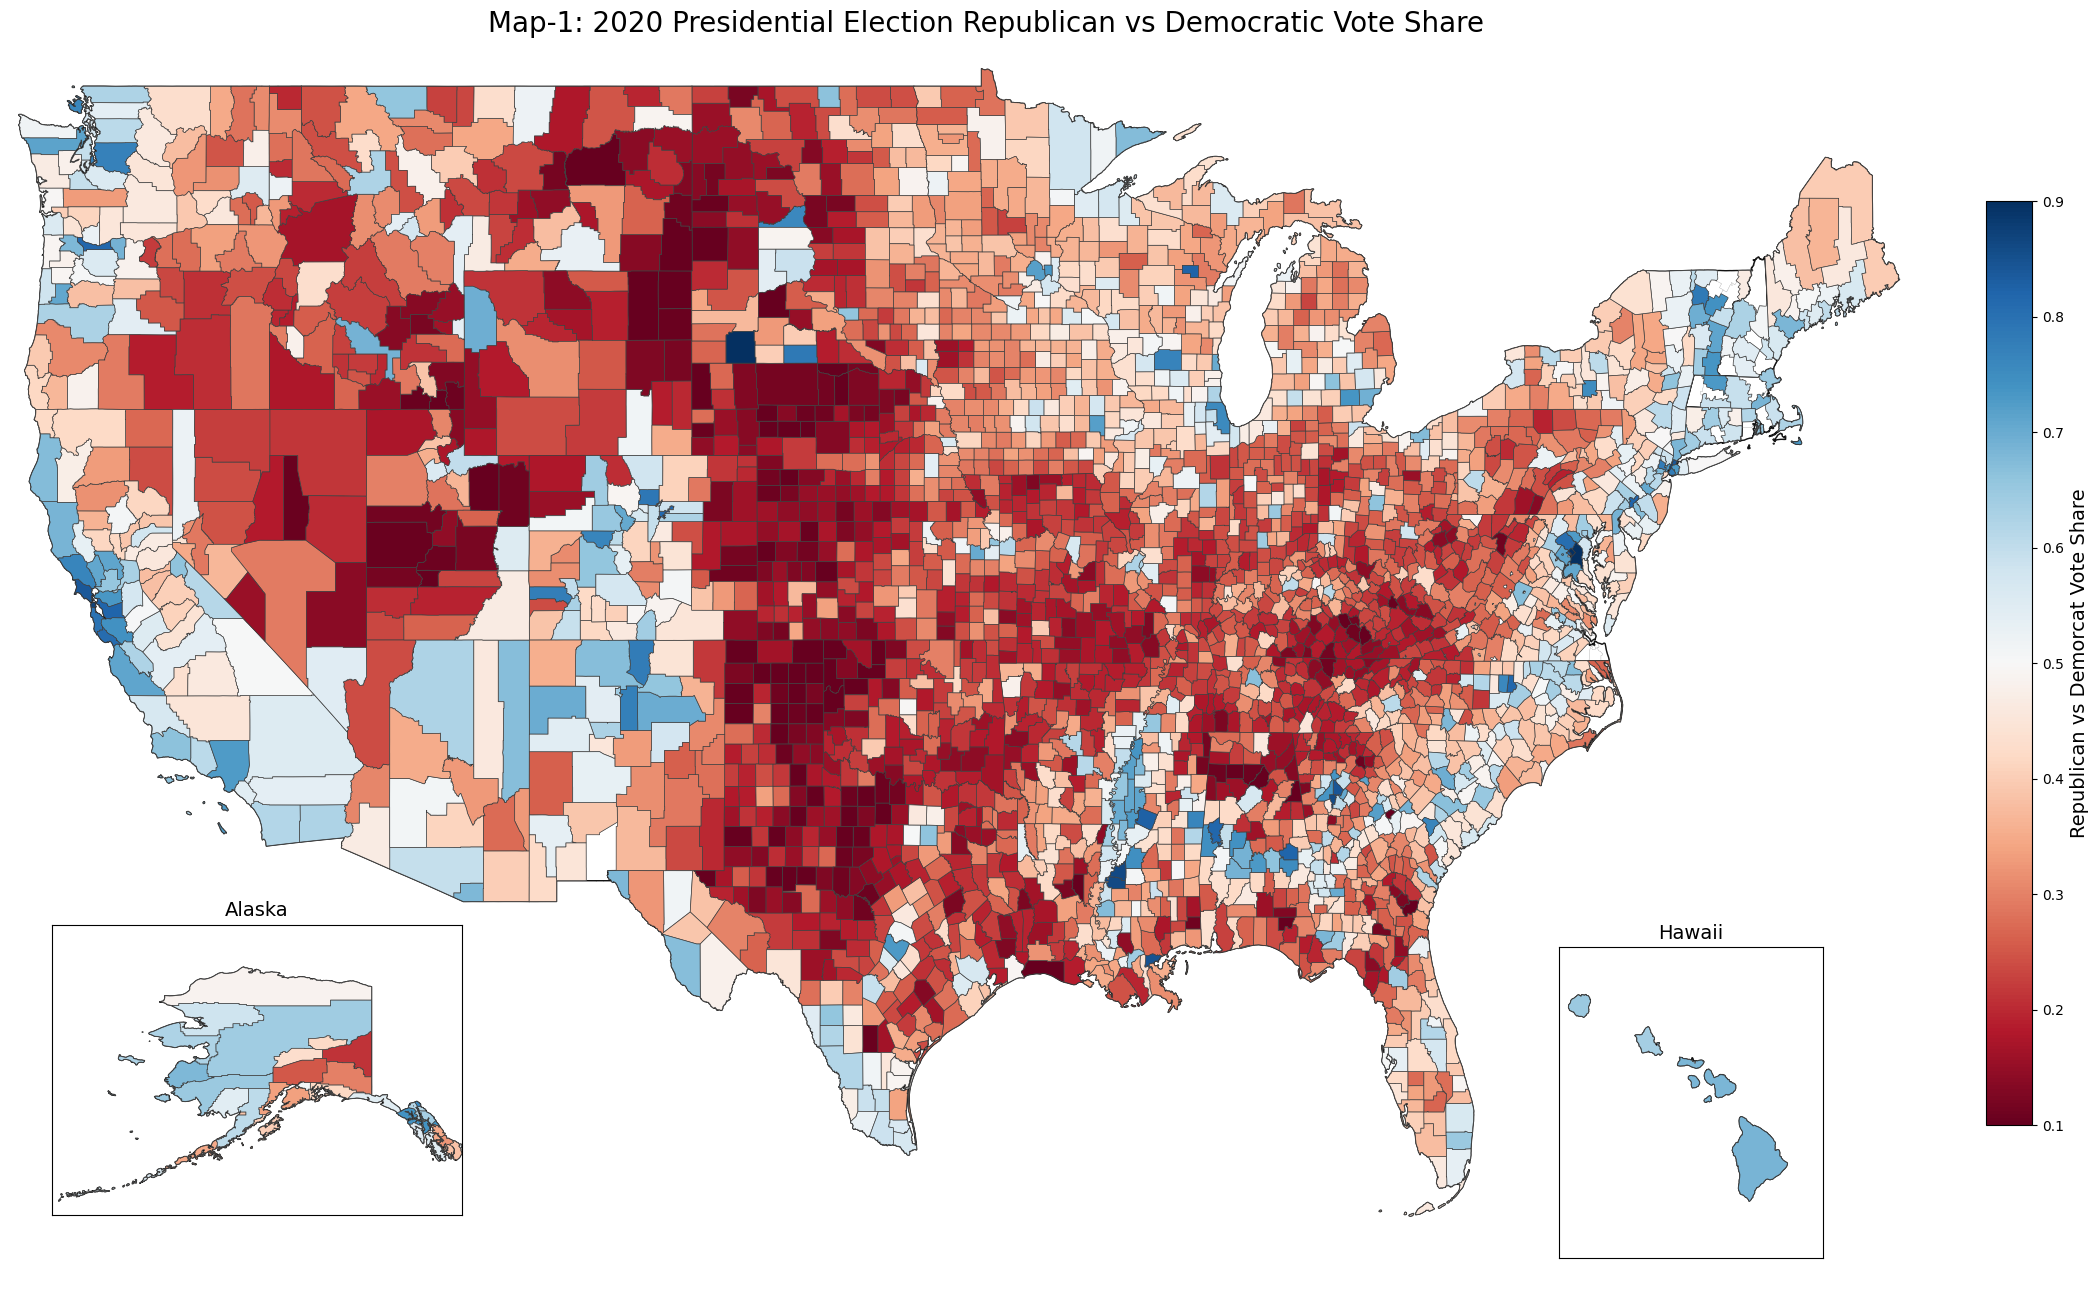

In [92]:
# Map-1: Map-1: 2020 Presidential Election Republican vs Democratic Vote Share

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="gray", color="none", 
                                                 linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="gray", color="none", 
                                                 linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)


# setup 'party_color'
county_map_df['party_color'] = county_map_df['party'].map(lambda x: colors.get(x, '#e6ebed'))
# Plot continental
county_map_df.plot(
    ax=gax, edgecolor='#404040', column='Rel_DEM_Vote_Percentage', legend=False, 
    linewidth=0.5, cmap='RdBu', vmin=0.1, vmax=0.9)
# Plot Hawaii
county_map_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Rel_DEM_Vote_Percentage', legend=False, 
    linewidth=0.5, cmap='RdBu', vmin=0.1, vmax=0.9)
# Plot Alaska
county_map_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Rel_DEM_Vote_Percentage', legend=False, 
    linewidth=0.5, cmap='RdBu', vmin=0.1, vmax=0.9)

#gax.set_xlabel('Longitude')
#gax.set_ylabel('Latitude')
gax.set_title('Map-1: 2020 Presidential Election Republican vs Democratic Vote Share', fontsize=20)

# set axis
#gax.spines['top'].set_visible(False)
#gax.spines['right'].set_visible(False)
gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])
ax_inset_hawaii.set_xticks([])
ax_inset_hawaii.set_yticks([])
ax_inset_alaska.set_xticks([])
ax_inset_alaska.set_yticks([])

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.01)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=14)

# legend position and font size
#gax.legend(bbox_to_anchor=(0.1, 1.0), ncol=3, fontsize='medium')

#gax.annotate('Republican vs Demorcat Vote Share',xy=(-66, 24.5), fontsize=14)

# Display the map
plt.show()


This map shows the winning vote percentage, with the color, for each county in the US with state and county borders. This tells us how much of the county share each county won by the winning party. The Republicans dominated Central USA, with many counties being very dark red. A large portion of the counties are red, just as Graph 1 showed. The Democrats won most East and West Coast counties, but not by huge margins, like the Republicans won in some counties in the Central US.

<br>

### Map-2: 2020 Presidential election Republican vs Democratic Vote Share and urban density

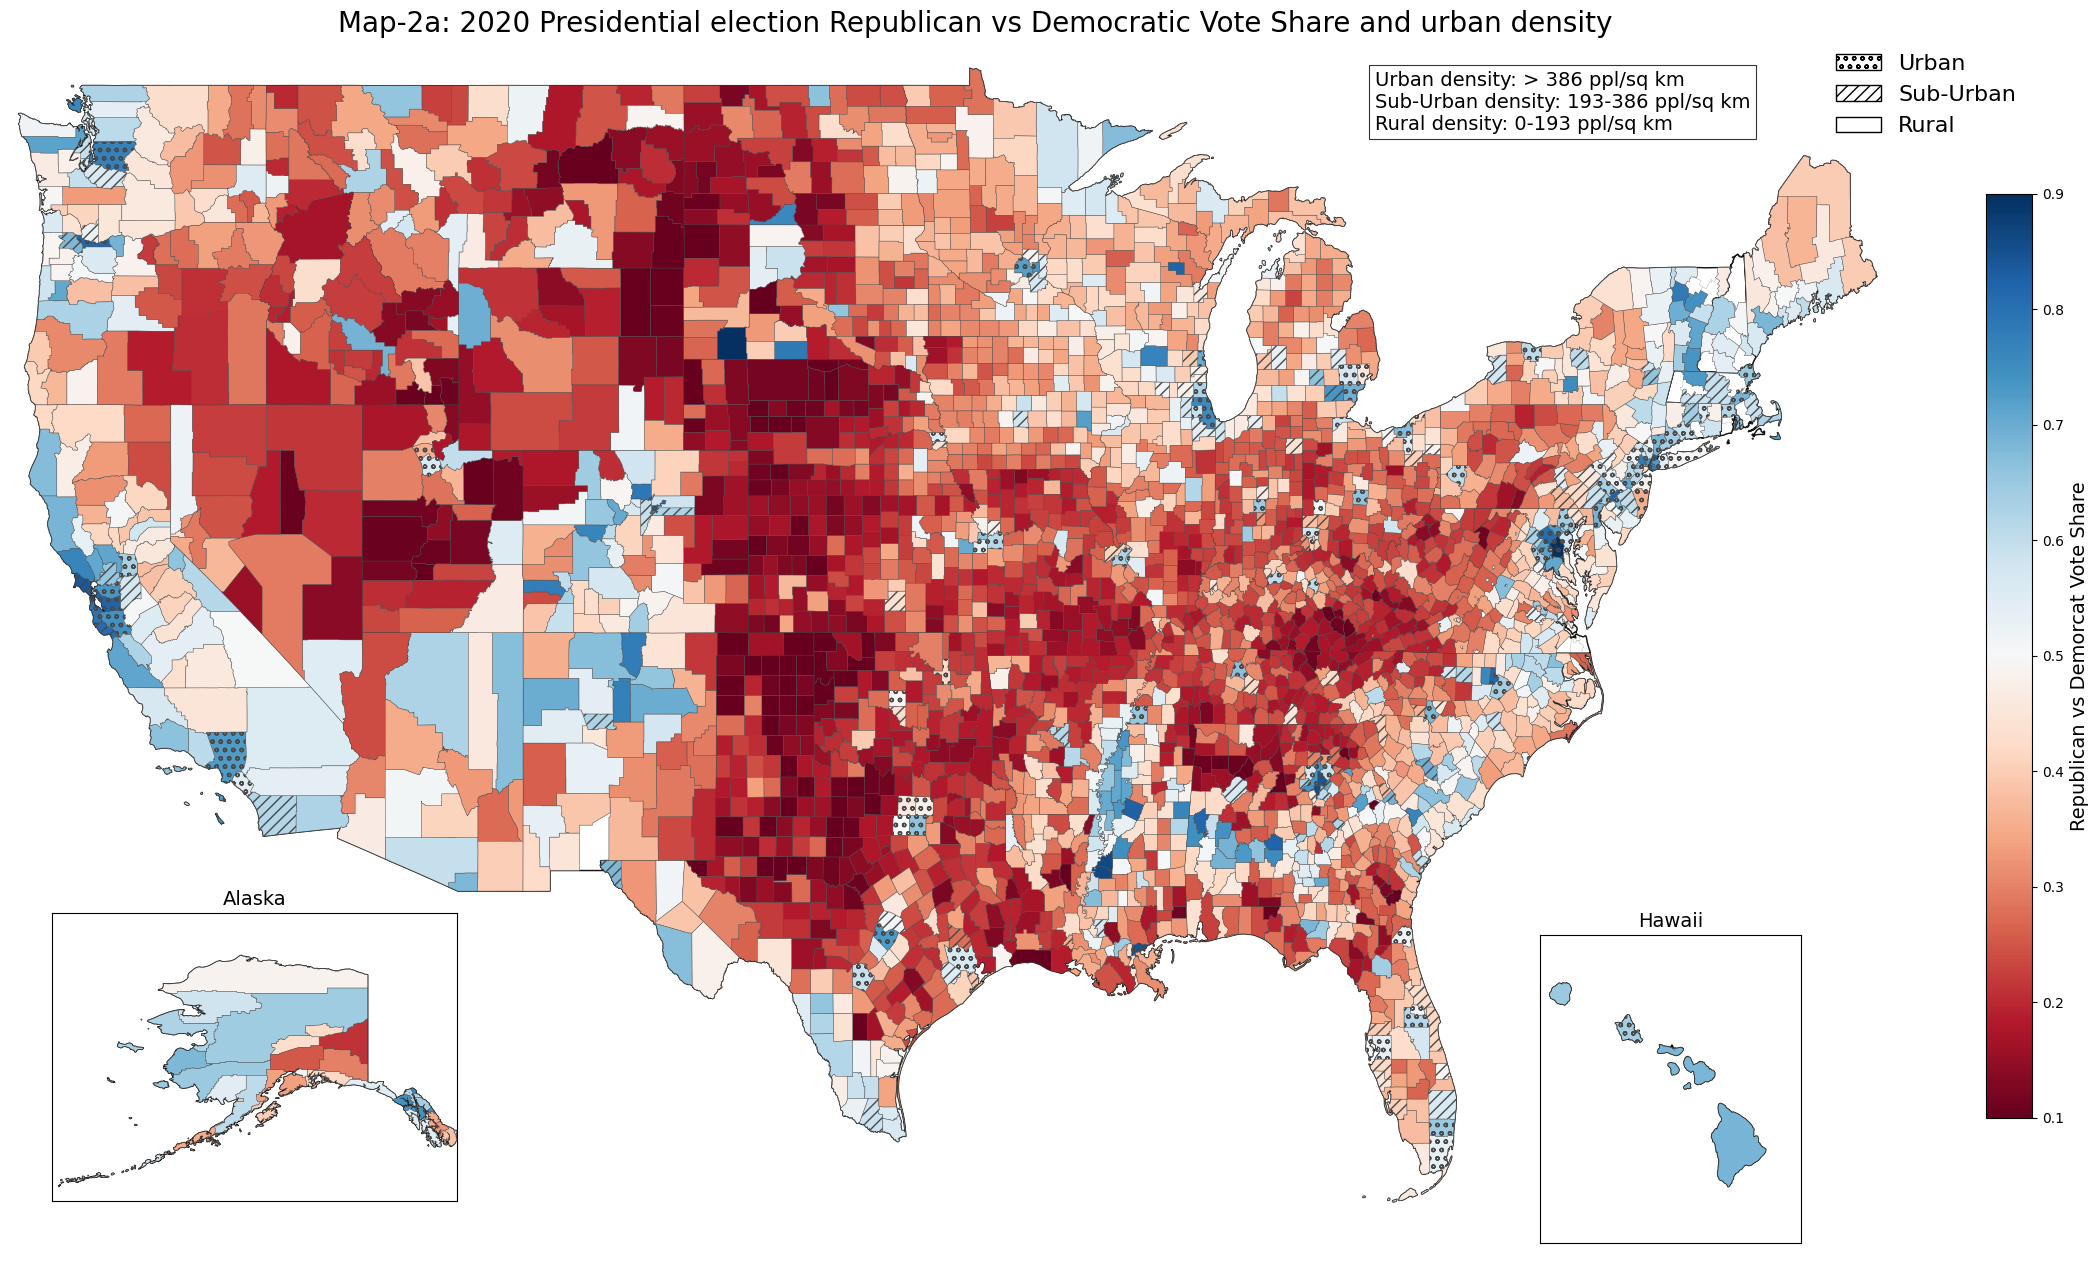

In [93]:
# Map-2: 2020 Presidential election Republican vs Democratic Vote Share and urban density

# Define custom pattern for each type
area_pattern = {
    'Urban': "oo", 
    'Sub-Urban': "///",
    'Rural': ""
}
# Add 'area_pattern' column to the GeoDataFrame
county_map_df['area_pattern'] = county_map_df['Area_Type'].map(lambda x: area_pattern.get(x, ''))

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="black", color="none", 
                                                 linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="black", color="none", 
                                                 linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental 
for area_type, pattern in area_pattern.items():
    sub_area = county_map_df[county_map_df['Area_Type'] == area_type]
    # Plot continental 
    sub_area.plot(
        ax=gax, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
        cmap='RdBu', vmin=0.1, vmax=0.9,
        linewidth=0.3, hatch=pattern
    )
    # Plot Hawaii
    sub_area.plot(
            ax=ax_inset_hawaii, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )
    # Plot Alaska
    sub_area.plot(
            ax=ax_inset_alaska, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )
#gax.set_xlabel('Longitude')
#gax.set_ylabel('Latitude')
gax.set_title("Map-2a: 2020 Presidential election Republican vs Democratic Vote Share and "
               "urban density", fontsize=20)

# set axis
#gax.spines['top'].set_visible(False)
#gax.spines['right'].set_visible(False)
gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])
ax_inset_hawaii.set_xticks([])
ax_inset_hawaii.set_yticks([])
ax_inset_alaska.set_xticks([])
ax_inset_alaska.set_yticks([])

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=14)

# Add a legend for hatch patterns
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=pattern, label=area_type)
    for area_type, pattern in area_pattern.items()
]
hatch_legend = gax.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.05, 1.005),  # Move the legend up (y-coordinate > 1)
          frameon=False, # remove borders,
          prop={'size': 16}, fontsize='medium')
hatch_legend.get_title().set_fontsize(14)  # Set the title font size

# Add a text box with income level information
text_box = (
    "Urban density: > 386 ppl/sq km\n"
    "Sub-Urban density: 193-386 ppl/sq km\n"
    "Rural density: 0-193 ppl/sq km"
)
fig.text(
    x=0.58,  # X position (right side of the plot)
    y=0.69,  # Y position (top of the plot)
    s=text_box,
    #transform=plt.gca().transAxes,  # Use axis coordinates
    fontsize=14,
    verticalalignment='top',  # Align text to the top
    horizontalalignment='left',  # Align text to the left
    transform=fig.transFigure,  # Use figure coordinates
    bbox=dict(
        #boxstyle='round',  # Rounded box
        facecolor='white',  # Background color
        alpha=0.8,  # Transparency
        edgecolor='black',  # Border color
        linewidth=0.8  # Thinner edge width
    )    
)

# Display the map
plt.show()


This map shows the winning vote percentage and each county's urban density. Each county was categorized into three categories: rural (0 - 193), suburban (193.01 - 386), and urban (386.01 and above). The democratic party won most urban counties, while the Republicans won most rural counties. Suburban counties were very close in vote shares, with either party winning by small amounts. This shows how the Democratic party could win the election while only winning 514 counties compared to 2575. Counties won by the Democrats were mainly highly populated, proving they were likely cities.

<br>

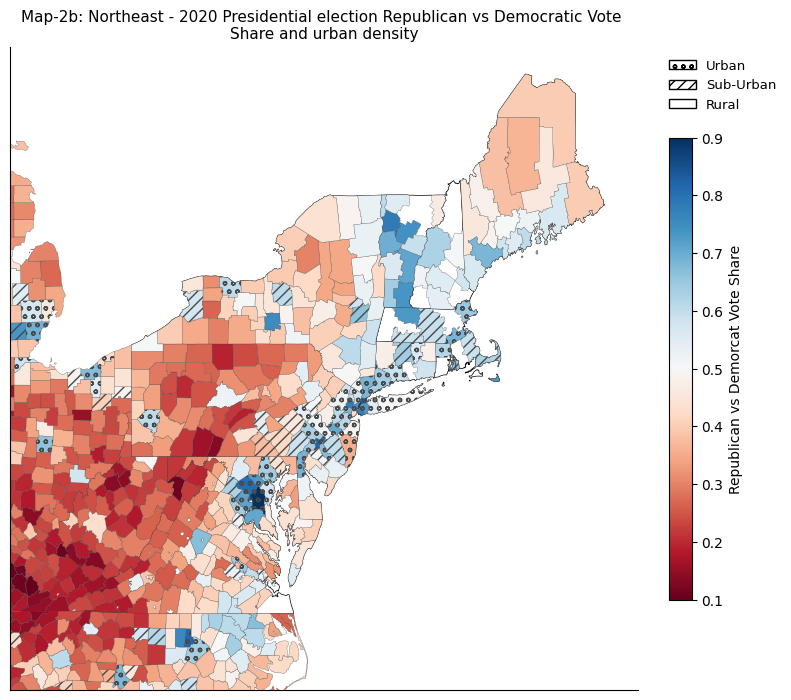

In [94]:
# Map-2b: Northeast-2020 Presidential election Republican vs Democratic Vote Share and urban density

# Create figure
fig, gax = plt.subplots(figsize=(10, 10))  

# Plot just the Northeast states (you can customize this list)
northeast_states = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'VA', 'WV']
northeast = state_df[state_df['STUSPS'].isin(northeast_states)]
northeast.plot(ax=gax, edgecolor="black", color="white", linewidth=0.5)

# Zoom coordinates for Northeast (adjusted after testing)
gax.set_xlim(-84, -66)  # Longitude range
gax.set_ylim(35, 48)    # Latitude range

# Plot counties (same as before)
for area_type, pattern in area_pattern.items():
    sub_area = county_map_df[county_map_df['Area_Type'] == area_type]
    sub_area.plot(
        ax=gax, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
        cmap='RdBu', vmin=0.1, vmax=0.9,
        linewidth=0.2, hatch=pattern
    )

# Keep all other styling the same
gax.set_title("Map-2b: Northeast - 2020 Presidential election Republican vs Democratic Vote \nShare and urban density", 
              fontsize=11)

# set axis
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
#gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.6, pad=0.04)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=10)

# Add a legend for hatch patterns
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=pattern, label=income_type)
    for income_type, pattern in area_pattern.items()
]
hatch_legend = gax.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.24, 1.0),  # Move the legend up (y-coordinate > 1)
          frameon=False, # remove borders,
          prop={'size': 9.5}, fontsize=10, title_fontsize=12)

plt.show()


### Map-3: Degree attainment in Republican and Democrat-won counties

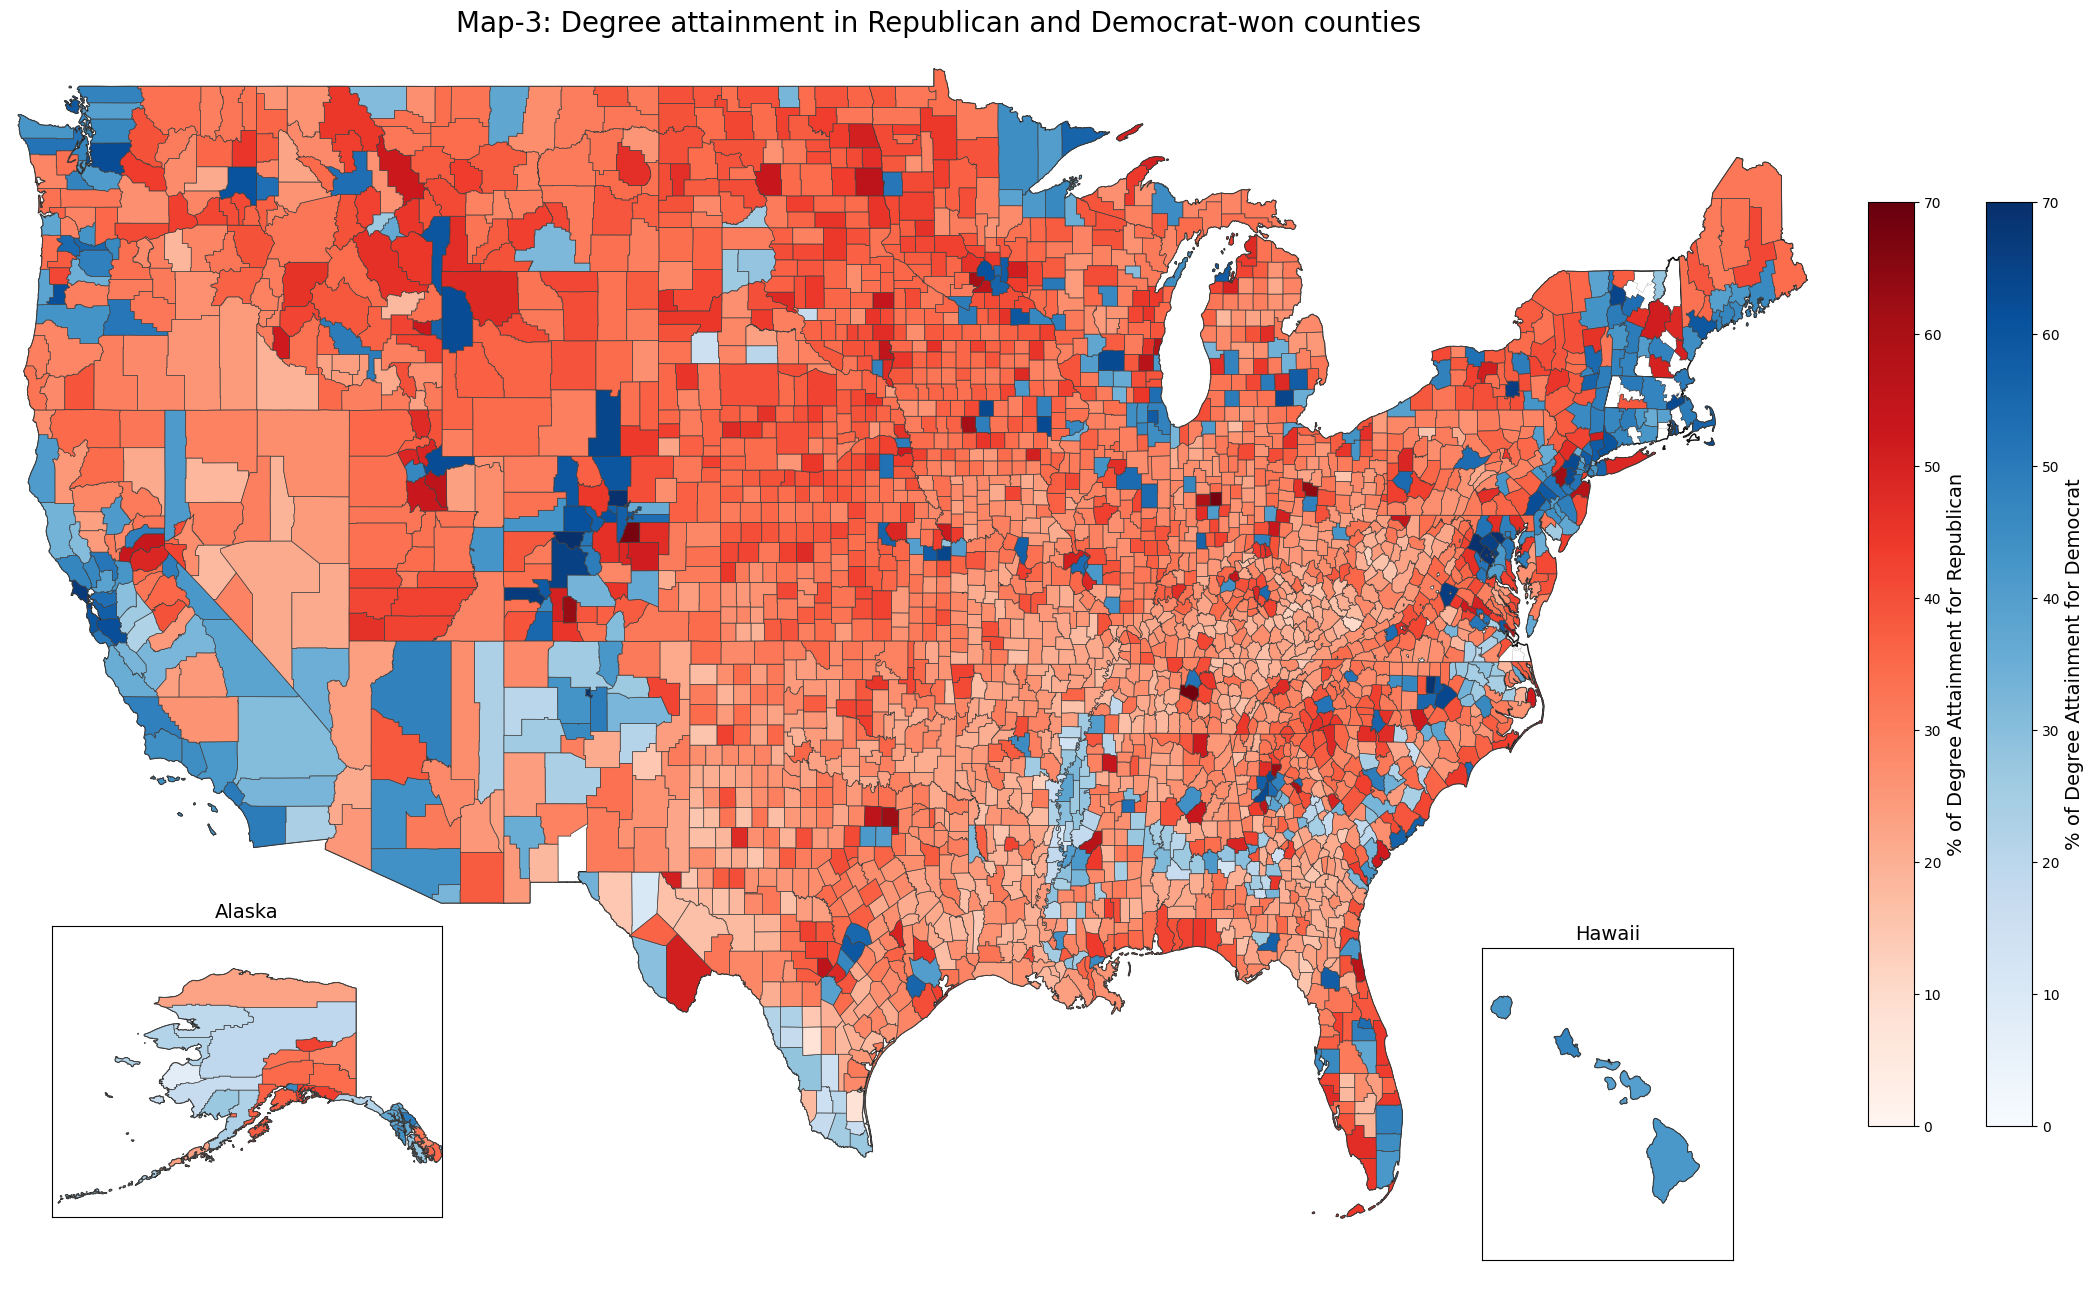

In [95]:
# Map-3: Degree attainment in Republican and Democrat-won counties

# Demorat only
county_map_dem_df = county_map_df.loc[county_map_df['party'] == 'Democrat'].copy()
# Republican
county_map_rep_df = county_map_df.loc[county_map_df['party'] == 'Republican'].copy()

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="gray", 
                                                 color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="gray", 
                                                 color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot Democrat
# Plot continental
county_map_dem_df.plot(
    ax=gax, edgecolor='#404040', column='Degree_Or_Higher_Percentage', 
    legend=False, linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)
# Plot Hawaii
county_map_dem_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Degree_Or_Higher_Percentage', 
    legend=False, linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)
# Plot Alaska
county_map_dem_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Degree_Or_Higher_Percentage', 
    legend=False, linewidth=0.5, cmap='Blues', vmin=0.0, vmax=70)

# Plot Republican
# Plot continental
county_map_rep_df.plot(
    ax=gax, edgecolor='#404040', column='Degree_Or_Higher_Percentage', 
    legend=False, linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)
# Plot Hawaii
county_map_rep_df.plot(
    ax=ax_inset_hawaii, edgecolor='#404040', column='Degree_Or_Higher_Percentage', 
    legend=False, linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)
# Plot Alaska
county_map_rep_df.plot(
    ax=ax_inset_alaska, edgecolor='#404040', column='Degree_Or_Higher_Percentage', 
    legend=False, linewidth=0.5, cmap='Reds', vmin=0.0, vmax=70)

#gax.set_xlabel('Longitude')
#gax.set_ylabel('Latitude')
gax.set_title("Map-3: Degree attainment in Republican and Democrat-won counties", 
              fontsize=20)

# set axis
#gax.spines['top'].set_visible(False)
#gax.spines['right'].set_visible(False)
gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])
ax_inset_hawaii.set_xticks([])
ax_inset_hawaii.set_yticks([])
ax_inset_alaska.set_xticks([])
ax_inset_alaska.set_yticks([])

# Add a single color legend for the entire plot
sm1 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0.0, vmax=70))
sm1._A = []  # Fake up the array of the scalar mappable
cbar2 = fig.colorbar(sm1, ax=gax, shrink=0.4, pad=-0.09)
cbar2.set_label('% of Degree Attainment for Democrat', fontsize=14)

# Add a single color legend for the entire plot
sm2 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.0, vmax=70))
sm2._A = []  # Fake up the array of the scalar mappable
cbar2 = fig.colorbar(sm2, ax=gax, shrink=0.4, pad=0.0)
cbar2.set_label('% of Degree Attainment for Republican', fontsize=14)

# Display the map
plt.show()


This map shows the degree attainment of each county and the winning party for each county. From the map, it is shown that Republicans have a lot more counties won, in line with the previous findings, but also overall lower levels of education attainment, as most counties lie within the 10-30% degree attainment. While Democrats have many hotspots where counties have a degree attainment of 70%. Their overall degree attainment level across all counties is within the 20-40% rate. Major cities such as Los Angeles, New York City, and San Francisco all tended to be darker blue, with an education attainment of around 50%, further complementing our previous findings from Map 2.

<br>

### Map-4: County Income Levels and the 2020 Presidential Election Results

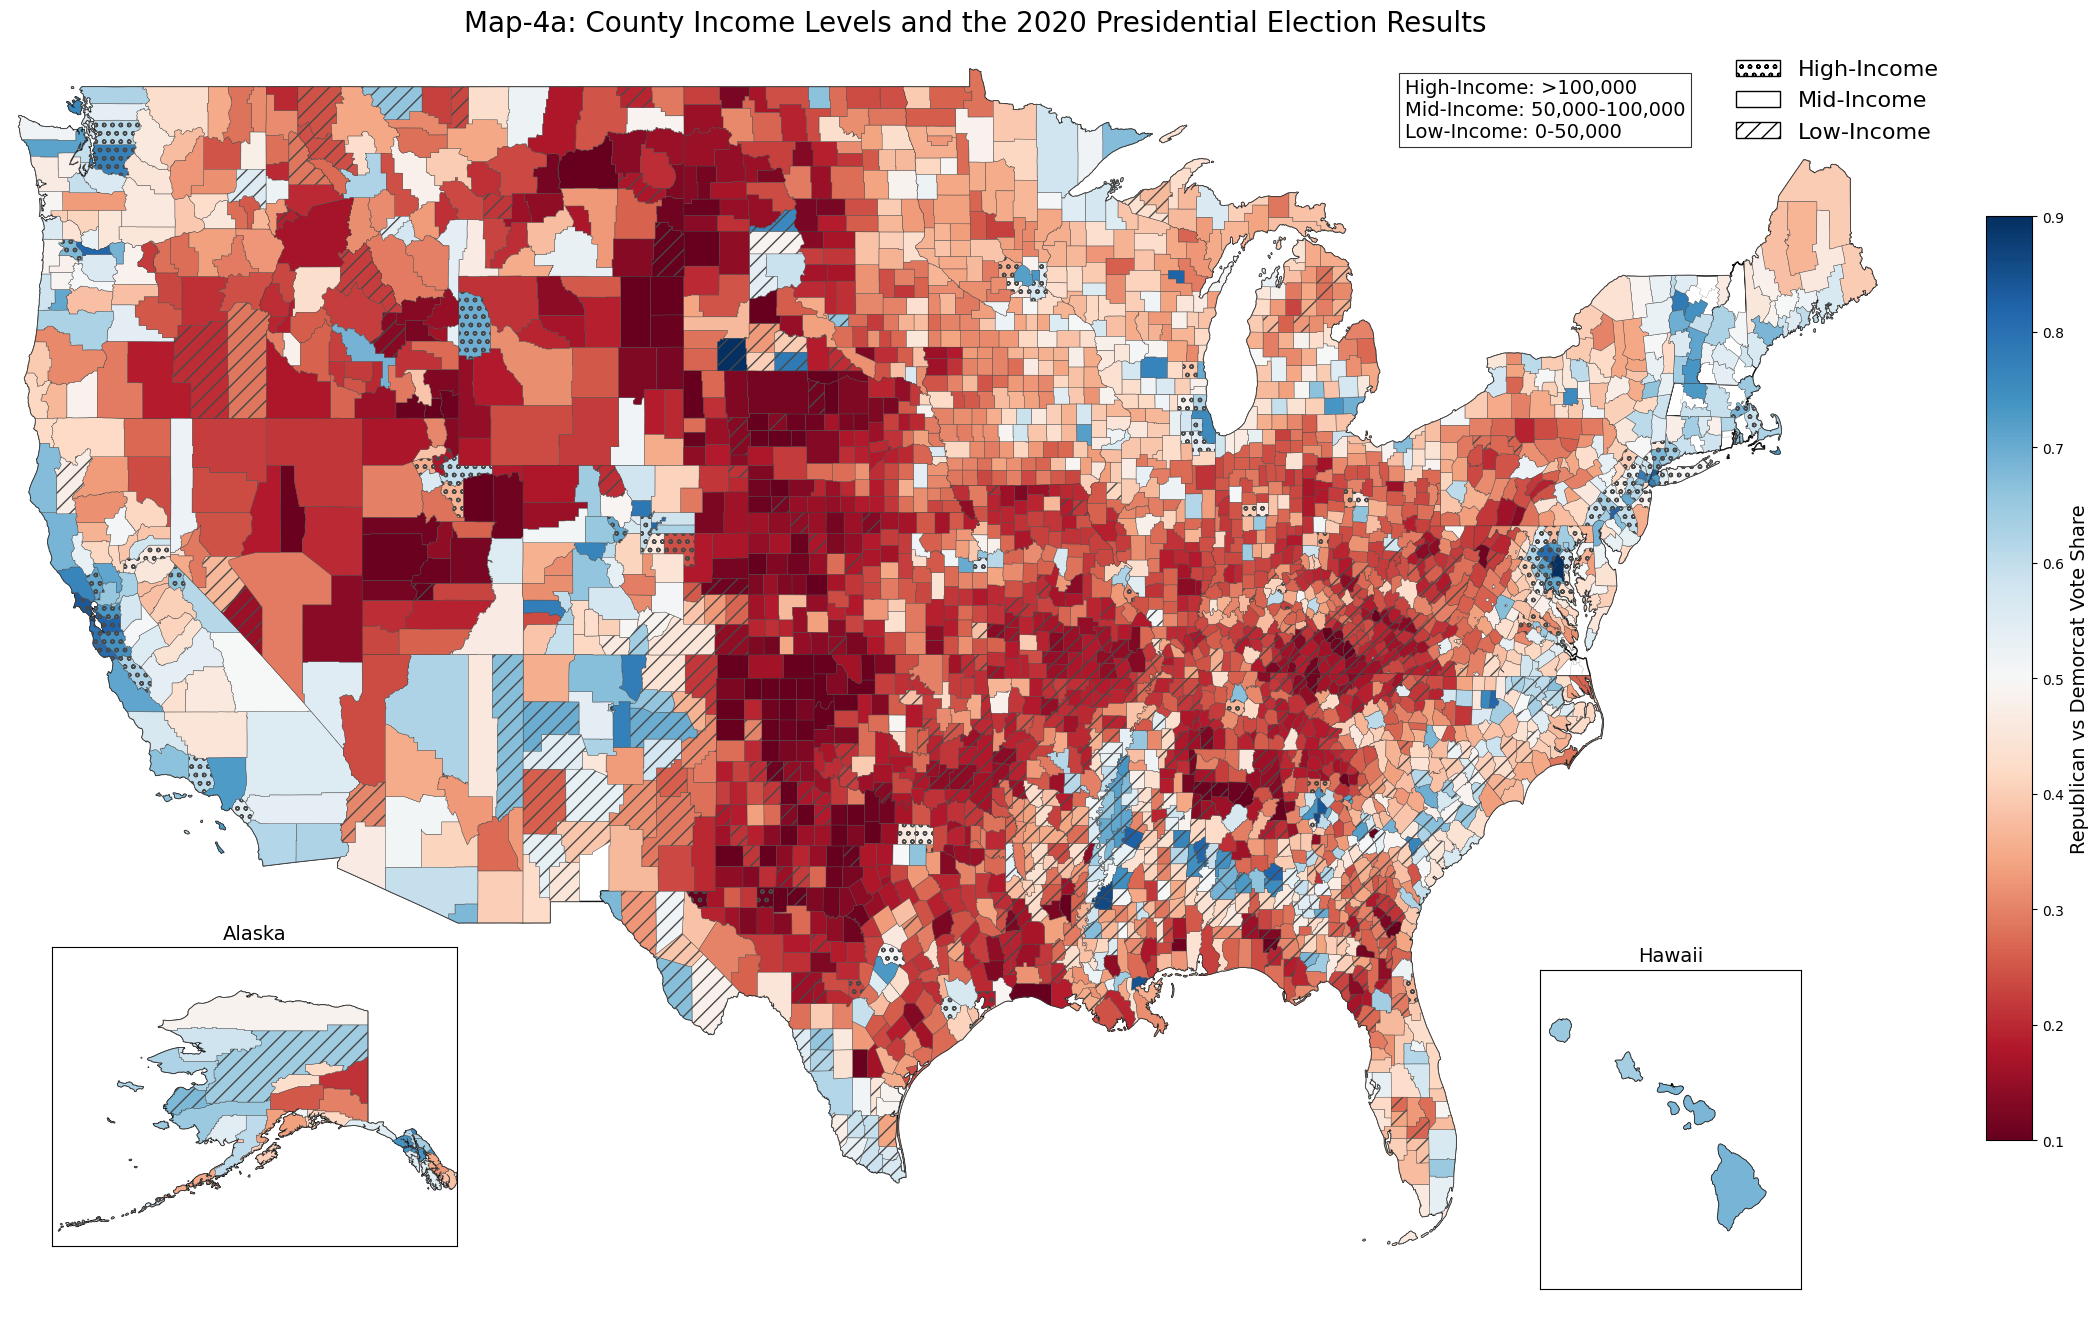

In [96]:
# Map-4a: County Income Levels and the 2020 Presidential Election Results

# Define custom pattern for each type
income_pattern = {
    "High-Income": "oo", 
    "Mid-Income": "",
    "Low-Income": "//"
}
# Add 'income_pattern' column to the GeoDataFrame
county_map_df['income_pattern'] = county_map_df['Income_Type'].map(lambda x: income_pattern.get(x, ''))

# Create a larger figure
fig, gax = plt.subplots(figsize=(30, 30))  # Increased figure size for overall map

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="black", color="white")
counties_df.plot(ax=gax, edgecolor="gray", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="black", 
                                                 color="none", linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="black", 
                                                 color="none", linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental 
for income_type, pattern in income_pattern.items():
    sub_income = county_map_df[county_map_df['Income_Type'] == income_type]
    # Plot continental 
    sub_income.plot(
        ax=gax, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
        cmap='RdBu', vmin=0.1, vmax=0.9,
        linewidth=0.3, hatch=pattern
    )
    # Plot Hawaii
    sub_income.plot(
            ax=ax_inset_hawaii, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )
    # Plot Alaska
    sub_income.plot(
            ax=ax_inset_alaska, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
            cmap='RdBu', vmin=0.1, vmax=0.9,
            linewidth=0.3, hatch=pattern
    )

#gax.set_xlabel('Longitude')
#gax.set_ylabel('Latitude')
gax.set_title('Map-4a: County Income Levels and the 2020 Presidential Election Results', 
              fontsize=20)
# set axis
#gax.spines['top'].set_visible(False)
#gax.spines['right'].set_visible(False)
gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])
ax_inset_hawaii.set_xticks([])
ax_inset_hawaii.set_yticks([])
ax_inset_alaska.set_xticks([])
ax_inset_alaska.set_yticks([])

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.4, pad=0.02)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=14)

# Add a legend for hatch patterns
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=pattern, label=income_type)
    for income_type, pattern in income_pattern.items()
]
hatch_legend = gax.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.01, 1.0),  # Move the legend up (y-coordinate > 1)
          frameon=False, # remove borders,
          prop={'size': 16}, fontsize='medium', title_fontsize=14)
#hatch_legend.get_title().set_fontsize(14)  # Set the title font size

# Add a text box with income level information
text_box = (
    "High-Income: >100,000\n"
    "Mid-Income: 50,000-100,000\n"
    "Low-Income: 0-50,000"
)
fig.text(
    x=0.59,  # X position (right side of the plot)
    y=0.695,  # Y position (top of the plot)
    s=text_box,
    #transform=plt.gca().transAxes,  # Use axis coordinates
    fontsize=14,
    verticalalignment='top',  # Align text to the top
    horizontalalignment='left',  # Align text to the left
    transform=fig.transFigure,  # Use figure coordinates
    bbox=dict(
        #boxstyle='round',  # Rounded box
        facecolor='white',  # Background color
        alpha=0.8,  # Transparency
        edgecolor='black',  # Border color
        linewidth=0.8  # Thinner edge width
    )    
)

# Display the map
plt.show()


This map shows each county's income level and respective vote share results. The United States has many mid-level income counties scattered everywhere. Low-income counties tend to appear more in the South, while the East and West covered most of the high-income counties, with a couple of exceptions. This map has no clear trends, as much of the South had a somewhat even distribution of Republican and Democrat-won counties that all showed low-income counties. This could show that income may not be a leading factor in explaining the presidential election results.

<br>

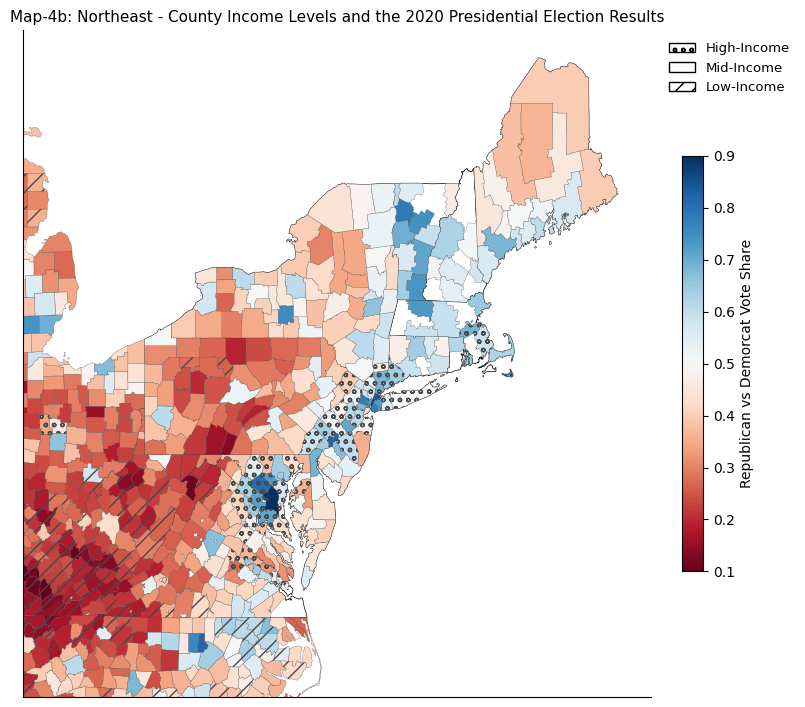

In [97]:
# Map-4b: Northeast-County Income Levels and the 2020 Presidential Election Results

# Create figure
fig, gax = plt.subplots(figsize=(10, 9))  # Slightly smaller for regional view

# Plot just the Northeast states (you can customize this list)
northeast_states = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'VA', 'WV']
northeast = state_df[state_df['STUSPS'].isin(northeast_states)]
northeast.plot(ax=gax, edgecolor="black", color="white", linewidth=0.5)

# Zoom coordinates for Northeast (adjusted after testing)
gax.set_xlim(-84, -66)  # Longitude range
gax.set_ylim(35, 48)    # Latitude range

# Plot counties (same as before)
for income_type, pattern in income_pattern.items():
    sub_income = county_map_df[county_map_df['Income_Type'] == income_type]
    # Plot continental 
    sub_income.plot(
        ax=gax, edgecolor='#484848', column='Rel_DEM_Vote_Percentage', 
        cmap='RdBu', vmin=0.1, vmax=0.9,
        linewidth=0.2, hatch=pattern
    )

# Title
gax.set_title("Map-4b: Northeast - County Income Levels and the 2020 Presidential Election Results", fontsize=11)

# set axis
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
#gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])

# Add a single color legend for the entire plot
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=0.1, vmax=0.9))
sm._A = []  # Fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=gax, shrink=0.6, pad=0.04)
cbar.set_label('Republican vs Demorcat Vote Share', fontsize=10)

# Add a legend for hatch patterns
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=pattern, label=income_type)
    for income_type, pattern in income_pattern.items()
]
hatch_legend = gax.legend(handles=legend_elements, loc='upper right',
          bbox_to_anchor=(1.24, 1.0),  # Move the legend up (y-coordinate > 1)
          frameon=False, # remove borders,
          prop={'size': 9.5}, fontsize=10, title_fontsize=12)

plt.show()


### Map-5: Education and Urban Density

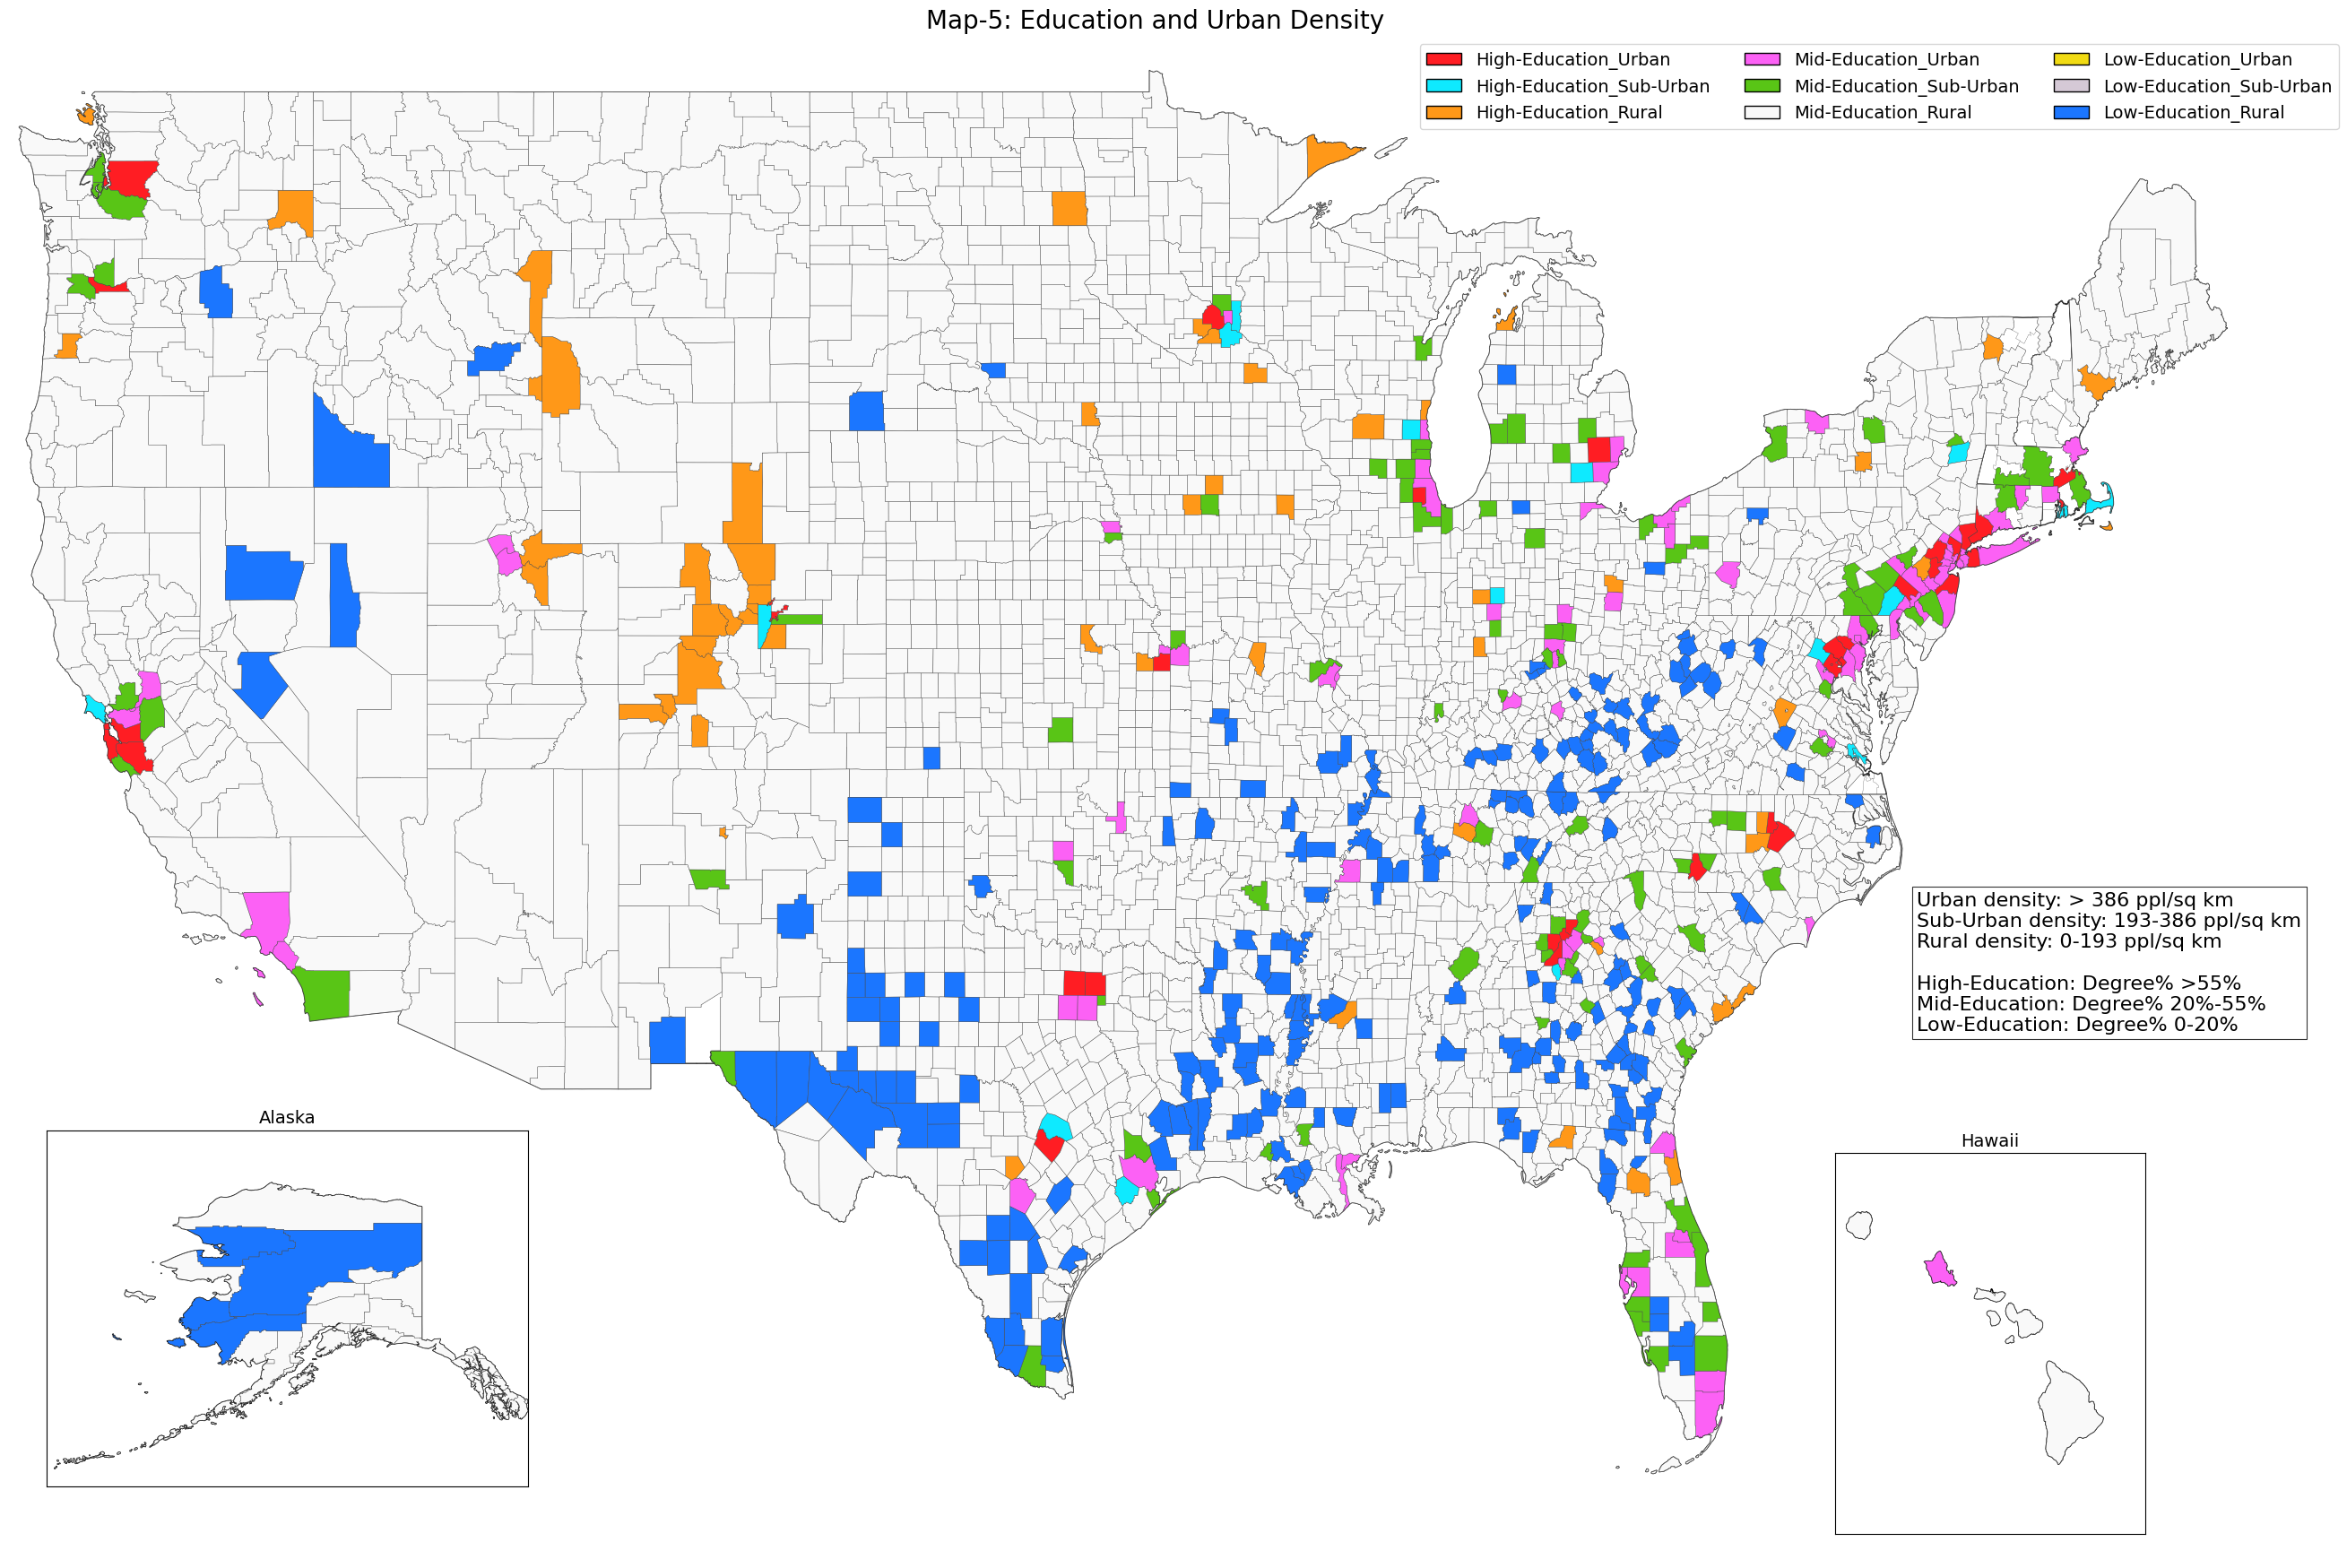

In [98]:
# Map-5: Education and Urban Density

# Define custom colors map
colors_map = {
    'High-Education_Urban': '#ff1d23', # 3+3=6
    'High-Education_Sub-Urban': '#0eeaff', # 3+2=5
    'High-Education_Rural': '#ff9818', # 3+1=4
    'Mid-Education_Urban': '#fc61f5', # 2+3=5
    'Mid-Education_Sub-Urban': '#59c516', # 2+2=4
    'Mid-Education_Rural': '#f9f9f9', # 2+1=3 ***
    'Low-Education_Urban': '#f1db13', # 1+3=4
    'Low-Education_Sub-Urban': '#d5c9d6', # 1+2=3
    'Low-Education_Rural': '#1b76ff', # 1+1=2
}
# Add 'Income_Education_Type' column
county_map_df['Education_Area_Type'] = county_map_df['Education_Type'] + "_" + county_map_df['Area_Type']

# Create a larger figure
fig, gax = plt.subplots(figsize=(33, 30))  # Increased figure size for overall map

# Plot the continental USA
continental_usa = state_df[~state_df['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude Alaska, Hawaii, and Puerto Rico
continental_usa.plot(ax=gax, edgecolor="#303030", color="white")
counties_df.plot(ax=gax, edgecolor="#303030", color="none", linewidth=0.1)  # Add county borders

# Zoom in on the continental USA (adjusted limits for a closer view)
gax.set_xlim(-125, -65)  # Narrowed the longitude range to zoom in more
gax.set_ylim(23, 50)     # Slightly adjusted latitude range

# Add an inset for Alaska (smaller inset size)
ax_inset_alaska = inset_axes(gax, width="21%", height="28%", loc="lower left", borderpad=3)
alaska = state_df[state_df['STUSPS'] == 'AK']
alaska.plot(ax=ax_inset_alaska, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '02'].plot(ax=ax_inset_alaska, edgecolor="black", color="none", 
                                                 linewidth=0.1)
ax_inset_alaska.set_xlim(-180, -130)
ax_inset_alaska.set_ylim(50, 75)
ax_inset_alaska.set_title("Alaska", fontsize=14)

# Add an inset for Hawaii (smaller inset size)
ax_inset_hawaii = inset_axes(gax, width="25%", height="25%", loc="lower right", borderpad=2)
hawaii = state_df[state_df['STUSPS'] == 'HI']
hawaii.plot(ax=ax_inset_hawaii, edgecolor="black", color="white")
counties_df[counties_df['STATEFP'] == '15'].plot(ax=ax_inset_hawaii, edgecolor="black", color="none", 
                                                 linewidth=0.1)
ax_inset_hawaii.set_xlim(-160, -154)
ax_inset_hawaii.set_ylim(18, 23)
ax_inset_hawaii.set_title("Hawaii", fontsize=14)

# Plot continental 
for education_area_type, ie_color in colors_map.items():
    sub_type = county_map_df[county_map_df['Education_Area_Type'] == education_area_type]
    count = sub_type['Education_Area_Type'].count()
    if count > 0:
        # Plot continental 
        sub_type.plot(
                ax=gax, edgecolor='#484848', legend=False, color=ie_color, 
                linewidth=0.3
        )
        # Plot Hawaii
        sub_type.plot(
                ax=ax_inset_hawaii, edgecolor='#484848', legend=False, color=ie_color, 
                linewidth=0.3
        )
        # Plot Alaska
        sub_type.plot(
                ax=ax_inset_alaska, edgecolor='#484848', legend=False, color=ie_color, 
                linewidth=0.3
        )

#gax.set_xlabel('Longitude')
#gax.set_ylabel('Latitude')
gax.set_title('Map-5: Education and Urban Density', fontsize=20)

# set axis
#gax.spines['top'].set_visible(False)
#gax.spines['right'].set_visible(False)
gax.set_axis_off()

# Remove axis ticks for cleaner look
gax.set_xticks([])
gax.set_yticks([])
ax_inset_hawaii.set_xticks([])
ax_inset_hawaii.set_yticks([])
ax_inset_alaska.set_xticks([])
ax_inset_alaska.set_yticks([])

# Create legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=label) 
                   for label, color in colors_map.items()]

# Add legend to the plot
gax.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1.0), ncol=3, fontsize='14')

# Add a text box with income level information
text_box = (
    "Urban density: > 386 ppl/sq km\n"
    "Sub-Urban density: 193-386 ppl/sq km\n"
    "Rural density: 0-193 ppl/sq km\n\n"
    "High-Education: Degree% >55%\n"
    "Mid-Education: Degree% 20%-55%\n"
    "Low-Education: Degree% 0-20%"
)

fig.text(
    x=0.77,  # X position (right side of the plot)
    y=0.46,  # Y position (top of the plot)
    s=text_box,
    fontsize=16,
    verticalalignment='top',  # Align text to the top
    horizontalalignment='left',  # Align text to the left
    transform=fig.transFigure,  # Use figure coordinates
    bbox=dict(
        #boxstyle='round',  # Rounded box
        facecolor='white',  # Background color
        alpha=0.8,  # Transparency
        edgecolor='black',  # Border color
        linewidth=0.8  # Thinner edge width
    )    
)

# Display the map
plt.show()


This map shows each county's level of education and urban density. Most significant cities fall within the urban and high-education categories, while most regular counties fell within the rural and mid-education levels. The counties in the South have a greater diversity of different category levels, with a more significant portion of rural and low-education counties appearing. Counties from southern states also have lower education level than other states. Urban density has some relationship with education, as every county with a high-density level has a mid to high education level. Education is higher in urban places compared to rural counties. Some connections between the voting results from Map 1 can be seen with the Democrats winning a significant portion of the southern states. Potential correlations between urban density and education on this map are further shown in Maps 2 and 3, as we can see from this map, a cross categorical sort for both variables.

<br>

## Regressions

The chosen independent variables and our dependent variable all showed a pattern or relationship. The relationship between the Y and X variables should be approximately linear. Looking at the X variables, education has a downward linear shape with the winning vote percentage, as Graph 2 shows. Intuitively, higher education could be correlated with lower Republican support. However, a very high level of education, such as PhD graduates, may be outliers as they could be well-versed in more political and economic fields, coming from both parties. As for other X variables, race and urban density showed a directional trend that makes up somewhat of a linear shape, as the highest vote share percentages for Republicans came
from the lowest urban density counties. In contrast, the highest Democratic vote share percentages came from the highest urban density counties.

The dependent variables for regressions will be urban density, degree attainment, population, income, race index, and white proportion. The race index is the dummy variable, with 1 indicating white-dominated counties and 0 indicating people-of-color-dominated counties. These X were selected as they demonstrated the demographic and socioeconomic factors within a county. House, Senate, and governor were not sued as they were not good predictors, as not every state and county will vote for these types of government every election year, meaning results will not be significant. They can only apply to a tiny portion of all counties. These X variables could explain the Y variable because other studies have been conducted on similar factors at the county levels and found significant trends. Voters for a specific party tend to have particular environments that push them to vote for a specific party, as some laws and regulations could potentially be more impactful for them than others.


In [92]:
import pandas as pd
import numpy as np
import qeds
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [93]:
# Load and prepare data for regressions

def load_reg_data():
    # Set variable to global scope
    global president_county_cand
    global alaska_president_county_cand
    global maine_president_county_cand
    global us_election
    global president_county_cand_won

    # load president_county_candidate.csv
    president_county_cand = pd.read_csv('../Data/president_county_candidate.csv')
    
    # load alaska_president_county_candidate.csv
    alaska_president_county_cand = pd.read_csv('../Data/alaska_president_county_candidate.csv')
    
    # load maine_president_county_candidate.csv
    maine_president_county_cand = pd.read_csv('../Data/maine_president_county_candidate.csv')
    
    # load US_Election_dataset_v1.csv
    us_election = pd.read_csv("../Data/US_Election_dataset_v1.csv")
    
    # data cleaning: president_county_cand
    # col 'state'
    president_county_cand['state'] = president_county_cand['state'].str.upper()
    president_county_cand['state'] = president_county_cand['state'].str.strip()
    president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
    # col 'county'
    president_county_cand['county'] = president_county_cand['county'].str.upper()
    president_county_cand['county'] = president_county_cand['county'].str.strip()
    president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
    # clean up Alaska records
    # remove alaska records
    president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'ALASKA' ]
    # add mapped alaska records to president_county_cand
    president_county_cand = pd.concat([president_county_cand, alaska_president_county_cand])
    # clean up Maine records
    # remove maine records
    president_county_cand = president_county_cand.loc[president_county_cand['state'] != 'MAINE' ]
    # add mapped maine records to president_county_cand
    president_county_cand = pd.concat([president_county_cand, maine_president_county_cand])
    
    # president_county_cand_won: filter in won is True
    president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
    #president_county_cand_won
    
    # data cleaning: us_election
    us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
    # col 'state'
    us_election['state'] = us_election['state'].str.upper()
    us_election['state'] = us_election['state'].str.strip()
    # col 'County Name'
    us_election['county'] = us_election['county'].str.upper()
    us_election['county'] = us_election['county'].str.strip()
    us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
    us_election['county'] = us_election['county'].str.replace(" CENSUS AREA", "")
    us_election['county'] = us_election['county'].str.replace(" CITY AND BOROUGH", "")
    us_election['county'] = us_election['county'].str.replace(" BOROUGH", "")
    us_election['county'] = us_election['county'].str.replace(" MUNICIPALITY", "")


# Load regression data
load_reg_data()


In [94]:
# Prepare necessary columns

def prepare_reg_data():

    # Set variable to global scope
    global president_county_cand
    global president_county_cand_won
    global us_election
    global final_df

    # Update party and Party_Index
    # president_county_cand: prepare columns
    party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
    party_map = {'DEM': 0.0, 'REP': 1.0}
    president_county_cand['Party_Index'] = president_county_cand['party'].map(party_map)
    president_county_cand['party'] = president_county_cand['party'].map(
        lambda x: party_dict.get(x, 'Third-Party'))
    
    # president_county_cand_won: prepare columns
    president_county_cand_won['Party_Index'] = president_county_cand_won['party']. \
                                               map(party_map)
    president_county_cand_won['party'] = president_county_cand_won['party']. \
                                         map(lambda x: party_dict.get(x, 'Third-Party'))
    #print(president_county_cand_won.head())

    # us_election: clean data and prepare new columns
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
    us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
    us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
    us_election['Median_Income'] = us_election['Median_Income'].div(1000.0)
    us_election['Won_Vote'] = us_election[["2020 Democrat vote raw", \
                              "2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
    us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + \
                                us_election["2020 Republican vote raw"] + \
                                us_election["2020 other vote raw"]
    us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
    us_election['Degree_Or_Higher_Percentage'] = \
            us_election["Associates Degree"].str.rstrip('%').astype('float') + \
            us_election["Bachelors Degree"].str.rstrip('%').astype('float') + \
            us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
    us_election['Race_Index'] = np.where(us_election['NH-White percentage'] >= 50, 1.0, 0.0)                             
    us_election['DEM_Vote_Percentage'] = us_election["2020 Democrat vote raw"] / \
                                         (us_election["2020 Republican vote raw"] + \
                                         us_election["2020 Democrat vote raw"] + \
                                         us_election["2020 other vote raw"])
    us_election['REP_Vote_Percentage'] = us_election["2020 Republican vote raw"] / \
                                         (us_election["2020 Republican vote raw"] + \
                                         us_election["2020 Democrat vote raw"] + \
                                         us_election["2020 other vote raw"])
    
    # Define the function to categorize population density
    def categorize_pop_density(density):
        if density < 39: 
            return 'Rural'
        elif density >= 39 and density <= 193:
            return 'Sub-Urban'
        else:
            return 'Urban'
    us_election['Area_Type'] = us_election['Density per square km'].apply(categorize_pop_density)
    us_election['Density_Per_Sq_Km_Log'] = np.log(us_election['Density per square km']) 
    us_election['Density_Per_Sq_Km_Log'] = us_election['Density_Per_Sq_Km_Log'].apply(lambda x: 0.0001 if x < 0 else x)
    #us_election['Density_Per_Sq_Km_Log'] = us_election['Density per square km'] / 100
    
    us_election['Population'] = us_election['Total Population'] / 1000
    area_index_map = {'Rural': 0, 'Sub-Urban': 1, 'Urban': 2}
    us_election['Area_Index'] = us_election['Area_Type'].map(area_index_map)
    us_election['Urban'] = us_election['Area_Type'].apply(lambda x: 1 if x == 'Urban' else 0)
    
    
    us_election['White_Proportion'] = us_election['NH-White percentage'] /100
    us_election['Degree_Or_Higher_Proportion'] = us_election['Degree_Or_Higher_Percentage'] / 100
    
    us_election['Occupation_Mgmt_Business'] = \
        us_election['Percentage engaged in Management, business, science, and arts occupations'] / 100
    us_election['Occupation_Resources_Construction'] = \
                            us_election['Percentage engaged in Resources and Construction'] / 100
    
    # Dummy variable
    president_county_cand_won['DEMOCRAT'] = president_county_cand_won['party'].\
                                            apply(lambda x: 1 if x == 'Democrat' else 0)
    president_county_cand_won['REPUBLICAN'] = president_county_cand_won['party'].\
                                            apply(lambda x: 1 if x == 'Republican' else 0)
    
    # merge datasets
    final_df = pd.merge(president_county_cand_won, us_election, \
                        on=['state', 'county'], how="inner")
    
    # With dummy variable Race_Index
    final_df['Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion'] = final_df['Density_Per_Sq_Km_Log'] * \
                                                                      final_df['Degree_Or_Higher_Proportion']
    final_df['Degree_Or_Higher_Proportion_x_Median_Income'] = final_df['Degree_Or_Higher_Proportion'] * \
                                                              final_df['Median_Income']
    final_df['Density_Per_Sq_Km_Log_x_Race_Index'] = final_df['Density_Per_Sq_Km_Log'] * \
                                                     final_df['Race_Index']
    final_df['Degree_Or_Higher_Proportion_x_Race_Index'] = final_df['Degree_Or_Higher_Proportion'] * \
                                                           final_df['Race_Index']

# Prepare regression data
prepare_reg_data()


### Regression Table 1: Regression table for demographic and socioeconomic factors on Democratic Vote Percentage


In [6]:
######################################################################
# Regression Table 1: Regression table for demographic and socioeconomic factors on 
#                     Democratic Vote Percentage
######################################################################

# Create lists of variables to be used in each regression
#Y = reg_df['Vote_Percentage']
Y = final_df['DEM_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X5 = sm.add_constant(X5)

model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0, model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index'])
stargazer.title("Regression-1: Y = Democratic Vote Share %")
stargazer.custom_columns(["Model-0", "Model-1", "model-2", "Model-3", "Model-4", "Model-5"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))






Formula:
$$\hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5$$

This regression will tell us how well our X variable explains our Y and which specific X variables are the strongest individual explainers, thus helping us answer the research question. It will also tell us how much demographic and socioeconomic factors affect how countries vote in the 2020 presidential election. From this table, the R-squared of each model gradually increases until our final model, which first shows that all our X factors are explanatory for our Y variable. The final R-squared value is 0.652, which shows a strong positive linear correlation. Our five base factors explain 65.2% of the variation from the dependent variable. All of our variables are statistically significant as the P value is less than 0.01, making this regression significant enough for statistical analysis. The strongest predictor is the degree attainment variable, as the R-squared value jumps from 0.482 to 0.620, and the second is urban density. The population had zero effect on being a predictor as it remained zero throughout the two models and was not significant enough.

<br>

### Regression Table 2: Regression table for demographic and socioeconomic factors on Republican Vote Percentage

In [7]:
######################################################################
# Regression Table 2: Regression table for demographic and socioeconomic factors on 
#                     Republican Vote Percentage
######################################################################

# Create lists of variables to be used in each regression
#Y = reg_df['Vote_Percentage']
Y = final_df['REP_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X5 = sm.add_constant(X5)

model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0, model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index'])
stargazer.title("Regression-1: Y = Republican Vote Share %")
stargazer.custom_columns(["Model-0", "Model-1", "model-2", "Model-3", "Model-4", "Model-5"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))






Similar numbers and trends were seen on the Republican side. The only difference is that the race index and white proportion are being flipped.

<br>

### Regression Table 3: Regression table with demographic and socioeconomic factors with interaction variables on Democrat Vote Percentage

In [8]:
######################################################################
# Regression Table 3: Regression table with demographic and socioeconomic factors with  
#                     interaction variables on Democrat Vote Percentage
######################################################################

# Create lists of variables to be used in each regression
Y = final_df['DEM_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index',
               'Density_Per_Sq_Km_Log_x_Race_Index']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X5 = sm.add_constant(X5)


model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0 ,model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index', 'Degree_Or_Higher_Proportion_x_Median_Income',
                           'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
                           'Degree_Or_Higher_Proportion_x_Race_Index',
                           'Density_Per_Sq_Km_Log_x_Race_Index'])
stargazer.title("Regression-2: Y = Democrat Vote Share % + Race Index (dummy variable)")
stargazer.custom_columns(["Model-0", "Model-1", "Model-2", "Model-3", "Model-4", "Model-Final"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))





Formula:
$$\hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6(X_3*X_4) + \beta_7(X_1*X_3) + \beta_8(X_3*X_6) + \beta_9(X_1*X_6)$$


This regression combines our base and new interaction variables using the highest explanatory variables. Using interaction variables, this regression could show the effect that our X variable has on Y while dependent on another X variable. Focusing on the two highest variables, education and urban density, this regression explored whether other factors impacted how well these variables explained the election results. Our R-squared result shows little increase, from 0.652 to 0.659, meaning these factors are all roughly consistent regardless of other variables. The density and education did not produce significant results, nor did the density and race index variable.

<br>

### Regression Table 4: Regression table with demographic and socioeconomic factors with interaction variables on Republican Vote Percentage

In [9]:
######################################################################
# Regression Table 4: Regression table with demographic and socioeconomic factors with interaction 
#                     variables on Republican Vote Percentage
######################################################################

# Create lists of variables to be used in each regression
Y = final_df['REP_Vote_Percentage']
X0 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index']]
X0 = sm.add_constant(X0)
X1 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income']]
X1 = sm.add_constant(X1)
X2 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion']]
X2 = sm.add_constant(X2)
X3 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X3 = sm.add_constant(X3)
X4 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Population', 'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
               'Degree_Or_Higher_Proportion_x_Race_Index',
               'Density_Per_Sq_Km_Log_x_Race_Index']]
X4 = sm.add_constant(X4)
X5 = final_df[['Density_Per_Sq_Km_Log', 'White_Proportion', 
               'Degree_Or_Higher_Proportion', 'Median_Income',
               'Race_Index', 
               'Degree_Or_Higher_Proportion_x_Median_Income',
               'Degree_Or_Higher_Proportion_x_Race_Index']]
X5 = sm.add_constant(X5)


model0 = sm.OLS(Y, X0, missing='drop').fit()
model1 = sm.OLS(Y, X1, missing='drop').fit()
model2 = sm.OLS(Y, X2, missing='drop').fit()
model3 = sm.OLS(Y, X3, missing='drop').fit()
model4 = sm.OLS(Y, X4, missing='drop').fit()
model5 = sm.OLS(Y, X5, missing='drop').fit()

# Display the Regression Results using Stargazer
stargazer = Stargazer([model0 ,model1, model2, model3, model4, model5])

# Set the same order of variables for all regressions
stargazer.covariate_order(['const', 'Density_Per_Sq_Km_Log', 'White_Proportion', 
                           'Degree_Or_Higher_Proportion', 'Median_Income', 'Population',
                           'Race_Index', 'Degree_Or_Higher_Proportion_x_Median_Income',
                           'Density_Per_Sq_Km_Log_x_Degree_Or_Higher_Proportion',
                           'Degree_Or_Higher_Proportion_x_Race_Index',
                           'Density_Per_Sq_Km_Log_x_Race_Index'])
stargazer.title("Regression-4: Y = Republican Vote Share % + Race Index (dummy variable)")
stargazer.custom_columns(["Model-0", "Model-1", "Model-2", "Model-3", "Model-4", "Model-Final"], 
                        [1, 1, 1, 1, 1, 1])

# Output the HTML representation of the regression table
html_output = stargazer.render_html()

# Print the HTML output
from IPython.display import display, HTML
display(HTML(html_output))






Similar to Table 3, the Republican side showed similar trends, with a final R-squared value slightly lower, at 0.651. The same interaction variables also showed little to no effect on the total combined model.

Formula: <br>
$\hat{Dem or Rep Vote Percentage} = \beta_0 + \beta_1(Density) + \beta_2(Degree) + \beta_3(White Proportion) + \beta_4(Income) + $
$$\beta_5(Race Index) + \beta_6(Degree * Income) + \beta_7(Degree * Race Index)$$


The final column of Tables 3 and 4 is our preferred specification model, the most accurate predictor model for both parties. These variables were selected because the population had no effect and was not a good explanatory variable. Density and education, and the density and the race index variable also provided statistically insignificant data and did not improve the R-squared value.

<br>

## Conclusion

This project explored demographic and socioeconomic factors in the 2020 election results. Some key findings are that most winning counties for the Republicans tend to have lower degree attainment, median income, and population density and are more white-dominated. The Republicans also won more counties than the Democrats but still lost. A potential explanation for this could be that most of the counties that the Republicans won had smaller populations and also did not contain as many major cities as the Democrats. Maps 2 and 3 align with these key findings, as Democrats seemed to win counties with higher attainment and urban density. Further exploring the different factors, the regression tables showed that the biggest key factor is education, with urban density following it. Map 4 highlights key counties with high education and urban density in the cities while being consistent with previous graphs and the map of winning percentages. Other factors that seemed significant but were not were made clear by the regression table. Further research can be conducted on the education level, and the quality and cost of education for citizens at the county level.

<br>

# Final Project

## Potential Data to Scrape

Investigate how COVID-19 deaths cumulative number affect the 2020 president election.


The deaths cumulative number data on county level was scraped from Delphi's COVID-19 Data Sources and Signals APIs (COVIDcast). By making http requests specifying the data source, signal, geographic level (county), and time period desired, it returned data in JSON format. Corresponding dataframe was created from that JSON format data. 
The base URL is https://api.delphi.cmu.edu/epidata/covidcast/.

</br>

## Potential Challenges

- The data should be retrieved easily (i.e. web API).
- The web API could query data by date. (i.e. just right before 2020 election date)


The deaths cumulative number data on county level was scraped from Delphi's COVID-19 Data Sources and Signals APIs (COVIDcast). By making http requests specifying the data source, signal, geographic level (county), and time period desired, it returned data in JSON format. Corresponding dataframe was created from that JSON format data. 
The base URL is https://api.delphi.cmu.edu/epidata/covidcast/.

</br>

## Scraping Data from a Website

In [113]:
import pandas as pd
import json
import requests

# Scrape epidata on county level
def scrape_epidata_county():
    # Set variable to global scope
    global df_epidata

    # load county_fips_master.csv (map county fips to county name and state)
    county_fips = pd.read_csv('../Data/county_fips_master.csv')
    #county_fips.head()

    # Data source reference: https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/usa-facts.html
    # deaths_cumulative_num, deaths_cumulative_prop (deaths number per 100k population)
    date_string = '20201101'
    web_url = "https://api.delphi.cmu.edu/epidata/covidcast/?api_key=9bca88a2ca08e&" \
              "data_source=usa-facts&signal=deaths_cumulative_num&time_type=day&" \
              "geo_type=county&time_values="+date_string+"&geo_value=*"

    response = requests.get(web_url)
    print('Status code\n', response.status_code)
    json_response = response.text
    
    # Parse the JSON response
    data = json.loads(json_response)

    # Extract the 'epidata' list
    epidata = data['epidata']

    # Convert to DataFrame
    df = pd.DataFrame(epidata)

    # Fill nan value with 0 (if any)
    df['value'] = df['value'].fillna(0)
    # Convert county_fips to int
    df['county_fips'] = df['geo_value'].astype(int) 
    #df.to_csv("covid.csv", index=False)
    
    # Select the desired columns
    df_data = df[["county_fips", 'geo_type', "signal", "time_value", "value"]]
    
    # merge with county_fips
    df_data = pd.merge(df_data, county_fips, \
                        left_on=['county_fips'], right_on=['fips'], how="inner")
    df_epidata = df_data[['county_fips', 'county_name', 'state_name', 'geo_type', 'signal', 'value', 'time_value']].copy()

    


In [120]:
# Scrape epidata on state level

def scrape_epidata_state():
    # Set variable to global scope
    global df_epidata

    # Data source reference: https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/usa-facts.html
    # deaths_cumulative_num, deaths_cumulative_prop (deaths number per 100k population)
    date_str_list = ['20200301', '20200316', '20200401', '20200416','20200501', '20200516',
                    '20200601', '20200616','20200701', '20200716','20200801', '20200816',
                    '20200901', '20200916','20201001', '20201016','20201101']
    
    for date_string in date_str_list:
        web_url = "https://api.delphi.cmu.edu/epidata/covidcast/?api_key=9bca88a2ca08e&" \
                  "data_source=usa-facts&signal=deaths_cumulative_num&time_type=day&" \
                  "geo_type=state&time_values="+date_string+"&geo_value=*"
        
        global df_epidata
        response = requests.get(web_url)
        print('Status code: ', response.status_code)
        json_response = response.text
    
        # Parse the JSON response
        data = json.loads(json_response)
    
        # Extract the 'epidata' list
        epidata = data['epidata']
    
        # Convert to DataFrame
        df = pd.DataFrame(epidata)

        # Fill nan value with 0 (if any)
        df['value'] = df['value'].fillna(0)
        df['state_code'] = df['geo_value'].str.upper() 
        #df.to_csv("covid.csv", index=False)
        
        # Select the desired columns
        df_data = df[['state_code', 'geo_type', "signal", "time_value", "value"]]

        # Concate to df_epidata
        df_epidata = pd.concat([df_epidata, df_data], axis=0)

    print("Done.") 


In [121]:
# Load and prepare data
load_reg_data()
prepare_reg_data()

df_epidata = pd.DataFrame()

# Scrape epidata state
scrape_epidata_state()

#df_epidata


Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Done.


## Visualizing the Scraped Dataset

In [122]:
# Load and prepare data
load_reg_data()
prepare_reg_data()

df_epidata = pd.DataFrame()

# Scrape epidata data on state level
scrape_epidata_state()
# df_epidata

Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Status code:  200
Done.


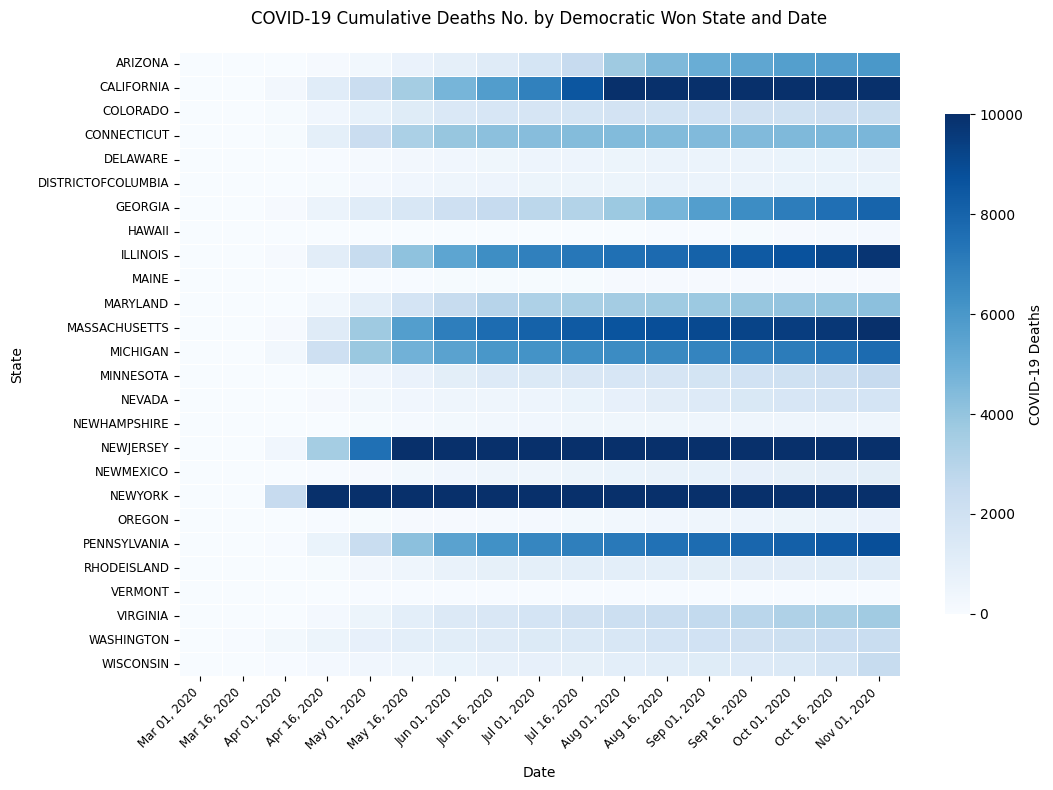

In [184]:
# Heat map - Democratic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load president_state_result.csv 
state_result = pd.read_csv('../Data/president_state_result.csv')
state_result['state_name'] = state_result['state_name'].str.replace(" ", "")

# merge with state_result
df_state_data = pd.merge(df_epidata, state_result, \
                   left_on=['state_code'], right_on=['state_code'], how="inner")
df_state_data = df_state_data[['state_name', 'party_won', 'value', 'time_value']].copy()
df_state_data['state_name'] = df_state_data['state_name'].str.replace(" ", "")
df_state_data['value'] = df_state_data['value'].fillna(0)

# Rename col deaths_cumulative_num 
df_state_data.rename(columns={'value': 'Deaths_Cumulative_Num'}, inplace=True)
df_state_data.rename(columns={'time_value': 'Date'}, inplace=True)
df_state_data.rename(columns={'state_name': 'State'}, inplace=True)

# Democratic state data
df_state_dem_data = df_state_data[df_state_data['party_won'] == 'DEMOCRAT']
df_state_dem_data = df_state_dem_data[['State', 'Date', 'Deaths_Cumulative_Num', ]]
#df_state_dem_data

# Convert 'Date' to datetime (important for sorting)
df_state_dem_data['Date'] = pd.to_datetime(df_state_dem_data['Date'], format='%Y%m%d')

# Pivot the data (State vs. Date)
heatmap_data = df_state_dem_data.pivot(index='State', columns='Date', values='Deaths_Cumulative_Num')

# Sort columns (dates) chronologically
heatmap_data = heatmap_data.sort_index(axis=1)

# Format dates for display (optional)
heatmap_data.columns = heatmap_data.columns.strftime('%b %d, %Y')

# Create the heatmap (with red gradient)
plt.figure(figsize=(11, 8))
ax = sns.heatmap(heatmap_data, cmap='Blues',
            vmin=0, vmax=10000, linewidths=0.5, 
            cbar_kws={
                'label': 'COVID-19 Deaths',
                'shrink': 0.8,  # Reduce size (0.5 = half default height)
                'aspect':20,   # Thinner bar (higher = thinner)
    }
)

# Adjust axis tick label font size
plt.xticks(fontsize=8.5)  # X-axis (dates) font size
plt.yticks(fontsize=8.5)  # Y-axis (states) font size

# Access the color bar and set font size
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(10)

# Customize the plot
plt.title('COVID-19 Cumulative Deaths No. by Democratic Won State and Date', pad=20, fontsize=12)
plt.xlabel('Date', fontsize=10, labelpad=10)
plt.ylabel('State', fontsize=10, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


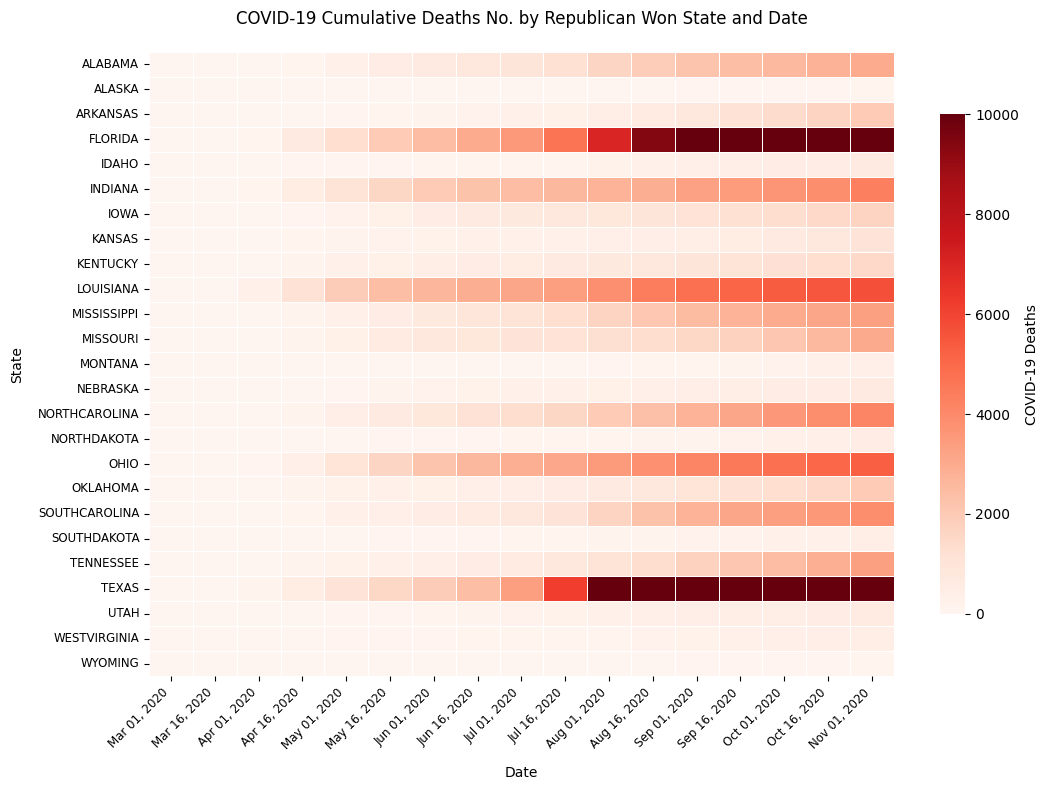

In [185]:
# Heat map - Republican
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# load president_state_result.csv 
state_result = pd.read_csv('../Data/president_state_result.csv')
state_result['state_name'] = state_result['state_name'].str.replace(" ", "")

# merge with state_result
df_state_data = pd.merge(df_epidata, state_result, \
                   left_on=['state_code'], right_on=['state_code'], how="inner")
df_state_data = df_state_data[['state_name', 'party_won', 'value', 'time_value']].copy()
df_state_data['state_name'] = df_state_data['state_name'].str.replace(" ", "")
df_state_data['value'] = df_state_data['value'].fillna(0)

# Rename col deaths_cumulative_num 
df_state_data.rename(columns={'value': 'Deaths_Cumulative_Num'}, inplace=True)
df_state_data.rename(columns={'time_value': 'Date'}, inplace=True)
df_state_data.rename(columns={'state_name': 'State'}, inplace=True)

# Democratic state data
df_state_rep_data = df_state_data[df_state_data['party_won'] == 'REPUBLICAN']
df_state_rep_data = df_state_rep_data[['State', 'Date', 'Deaths_Cumulative_Num', ]]
#df_state_rep_data

# Convert 'Date' to datetime (important for sorting)
df_state_rep_data['Date'] = pd.to_datetime(df_state_rep_data['Date'], format='%Y%m%d')

# Pivot the data (State vs. Date)
heatmap_data = df_state_rep_data.pivot(index='State', columns='Date', values='Deaths_Cumulative_Num')

# Sort columns (dates) chronologically
heatmap_data = heatmap_data.sort_index(axis=1)

# Format dates for display (optional)
heatmap_data.columns = heatmap_data.columns.strftime('%b %d, %Y')

colors = ["#fff5f5", "#a80000"]  # Light → Dark
cmap_custom = LinearSegmentedColormap.from_list("custom_red", colors)

# Create the heatmap (with red gradient)
plt.figure(figsize=(11, 8))
ax = sns.heatmap(heatmap_data, cmap='Reds', #'Reds',
            vmin=0, vmax=10000, linewidths=0.5, 
            cbar_kws={
                'label': 'COVID-19 Deaths',
                'shrink': 0.8,  # Reduce size (0.5 = half default height)
                'aspect':20,   # Thinner bar (higher = thinner)
    }
)

# Adjust axis tick label font size
plt.xticks(fontsize=8.5)  # X-axis (dates) font size
plt.yticks(fontsize=8.5)  # Y-axis (states) font size

# Access the color bar and set font size
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(10)

# Customize the plot
plt.title('COVID-19 Cumulative Deaths No. by Republican Won State and Date', pad=20, fontsize=12)
plt.xlabel('Date', fontsize=10, labelpad=10)
plt.ylabel('State', fontsize=10, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
# Republican state data
df_state_rep_data = df_state_data[df_state_data['party_won'] == 'REPUBLICAN']
df_state_rep_data = df_state_rep_data[['state_name', 'time_value', 'deaths_cumulative_num', ]]
df_state_rep_data


## Regression Tree

In [ ]:
def scrape_epidata_county():
    # Set variable to global scope
    global df_epidata

    # load county_fips_master.csv (map county fips to county name and state)
    county_fips = pd.read_csv('../Data/county_fips_master.csv')
    #county_fips.head()

    # Data source reference: https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/usa-facts.html
    # deaths_cumulative_num, deaths_cumulative_prop (deaths number per 100k population)
    date_string = '20201101'
    web_url = "https://api.delphi.cmu.edu/epidata/covidcast/?api_key=9bca88a2ca08e&" \
              "data_source=usa-facts&signal=deaths_cumulative_num&time_type=day&" \
              "geo_type=county&time_values="+date_string+"&geo_value=*"

    response = requests.get(web_url)
    print('Status code\n', response.status_code)
    json_response = response.text
    
    # Parse the JSON response
    data = json.loads(json_response)

    # Extract the 'epidata' list
    epidata = data['epidata']

    # Convert to DataFrame
    df = pd.DataFrame(epidata)

    # Fill nan value with 0 (if any)
    df['value'] = df['value'].fillna(0)
    # Convert county_fips to int
    df['county_fips'] = df['geo_value'].astype(int) 
    #df.to_csv("covid.csv", index=False)
    
    # Select the desired columns
    df_data = df[["county_fips", 'geo_type', "signal", "time_value", "value"]]
    
    # merge with county_fips
    df_data = pd.merge(df_data, county_fips, \
                        left_on=['county_fips'], right_on=['fips'], how="inner")
    df_epidata = df_data[['county_fips', 'county_name', 'state_name', 'geo_type', 'signal', 'value', 'time_value']].copy()

    


## Random Forest

## OLS vs ML

## Conclusion

This project explored demographic and socioeconomic factors in the 2020 election results. Some key findings are that most winning counties for the Republicans tend to have lower degree attainment, median income, and population density and are more white-dominated. The Republicans also won more counties than the Democrats but still lost. A potential explanation for this could be that most of the counties that the Republicans won had smaller populations and also did not contain as many major cities as the Democrats. Maps 2 and 3 align with these key findings, as Democrats seemed to win counties with higher attainment and urban density. Further exploring the different factors, the regression tables showed that the biggest key factor is education, with urban density following it. Map 4 highlights key counties with high education and urban density in the cities while being consistent with previous graphs and the map of winning percentages. Other factors that seemed significant but were not were made clear by the regression table. Further research can be conducted on the education level, and the quality and cost of education for citizens at the county level.

<br>

## Citations

Baccini, L., Brodeur, A., & Weymouth, S. (2021). *The COVID-19 pandemic and the 2020 US presidential election. Journal of Population Economics*, 34(2), 
739–767. National Library of Medicine. https://doi.org/10.1007/s00148-020-00820-3

Boyd, R. W., Krieger, N., & Jones, C. P. (2020). In the 2020 US election, we can choose a just future. *The Lancet*, 396(10260). https://doi.org/10.1016/s0140-6736(20)32140-1

essarabi. (2020). *US Election Dataset. Retrieved February 6, 2025*, from Kaggle.com website: https://www.kaggle.com/datasets/essarabi/ultimate-us-election-dataset/data

Fontes, R. (2021). *US Election 2020. Retrieved February 5, 2025*, from www.kaggle.com website: https://www.kaggle.com/datasets/unanimad/us-election-2020

Kim, Y. (2023). Absolutely Relative: How Education Shapes Voter Turnout in the United States. *Social Indicators Research*, 168(1-3), 447–469. https://doi.org/10.1007/s11205-023-03146-1

Gimpel, J. G., Lovin, N., Moy, B., & Reeves, A. (2020). The Urban–Rural Gulf in American Political Behavior. *Political Behavior*, 42(3), 1343–1368. https://doi.org/10.1007/s11109-020-09601-w

Kinsella, C., McTague, C., & Raleigh, K. N. (2015). *Unmasking geographic polarization and clustering: A micro-scalar analysis of partisan voting behavior. Applied Geography*, 62, 404–419. ScienceDirect. https://doi.org/10.1016/j.apgeog.2015.04.022

Laurison, D., Brown, H., & Rastogi, A. (2021). *Voting Intersections: Race, Class, and Participation in Presidential Elections in the United States 2008–2016. Sociological Perspectives*, 65(4), 073112142110591. https://doi.org/10.1177/07311214211059136

Smith, G. (2021). *Presidential Voting and County Composition; A Research Note on the 2020 Election. Presidential Voting and County Composition; a Research Note on the 2020 Election*, 1, 3. American Political Science Association. https://doi.org/10.33774/apsa-2021-m2h51

Tam Cho, W. K., Gimpel, J. G., & Hui, I. S. (2012). *Voter Migration and the Geographic Sorting of the American Electorate. Annals of the Association of American Geographers*, 103(4), 856–870. Taylor and Francis. https://doi.org/10.1080/00045608.2012.720229

Wing, I. S., & Walker, J. L. (2009). The Geographic Dimensions of Electoral Polarization in the 2004 U.S. Presidential Vote. *Progress in Spatial Analysis*, 253–285. https://doi.org/10.1007/978-3-642-03326-1_13

Zingher, J. N. (2022). Diploma divide: Educational attainment and the realignment of the American electorate. *Political Research Quarterly*, 75(2), 106591292210798. https://doi.org/10.1177/10659129221079862
<br>